# PROJETO DE ANÁLISE DOS MICRODADOS DO ENEM 2021

## IMPORTANDO BIBLIOTECAS

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from IPython.core.display import HTML
import multiprocessing as mp
from joblib import Parallel, delayed

## DEFININDO PARAMETROS PARA A PAGINA WEB DO JUPYTER

In [43]:
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

## COLENTANDO OS DADOS

In [44]:
# Lendo o dataset oficialmente e fazendo o primeiro head
data = pd.read_csv('DADOS//MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')
data.head(3)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,...,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,...,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B


In [45]:
# relendo o dataset para uma hipotese em especifico
dados = pd.read_csv('DADOS//MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')
data.head(3)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,...,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,...,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B


## OVERVIEW

In [46]:
data.sample(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
636649,210053110161,2021,3,F,1,3,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,4.0,1.0,1.0,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,370.3,530.7,560.6,434.5,BCBCEBAAACDAEACDEDBCABECECEDACCCADBDBBAECBAEA,ECACCCEBABCDEACAEAADCAEBADABDCBBADEDBBCCDEBAE,...,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,200.0,120.0,180.0,160.0,780.0,D,G,C,D,3.0,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,D,A,A,B
684366,210054319475,2021,3,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3142908,Monte Azul,31,MG,1,1,1,1,911.0,880.0,890.0,902.0,425.5,464.8,462.0,496.3,CCBACCACBACABEDBDAABDADCDBBBABEDCDECCDABEEDAE,DBABADDCBCAEBCDECEBADEBAABABBCBDBBDEAACBAEDBA,...,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,160.0,120.0,120.0,100.0,620.0,B,E,F,B,3.0,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
23004,210051783844,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3172004,Visconde do Rio Branco,31,MG,1,1,1,1,912.0,882.0,891.0,901.0,494.5,564.5,494.9,583.6,EABCBCCCECDDAABCADECBDCDDDEECBCDDCCECBAAADEBE,CCEACACABADEBDBEBCBEAADBBDACECAABCADAEBECABED,...,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,160.0,200.0,200.0,920.0,C,E,B,B,3.0,C,A,B,C,A,B,B,A,A,A,B,A,A,B,A,A,C,A,B,B
757551,210053690581,2021,13,F,1,3,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2606002,Garanhuns,26,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,3.0,E,A,B,D,B,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B
757981,210053517879,2021,3,M,1,3,1,2,0,2,1.0,0,3508504.0,Caçapava,35.0,SP,2.0,1.0,1.0,3508504,Caçapava,35,SP,1,1,1,1,909.0,881.0,892.0,899.0,474.3,0.0,544.1,562.0,EDDBADEECBAAEDBBCDBBEECCCBDDEAEDABAAEBBAADACA,.............................................,...,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,140.0,120.0,620.0,C,D,C,C,4.0,F,A,B,D,B,A,B,A,A,A,B,A,A,C,A,A,D,A,B,B
514742,210052936593,2021,5,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504604,Mocajuba,15,PA,1,1,1,1,912.0,882.0,891.0,901.0,519.4,471.7,503.9,435.4,DADCBACBECDEDEBBEDCDCDAEAAB*AEBDCAEDCCEECECCE,EEABCCBAEACBAEAEABABBCADBEDDAACCBCCEBEBEEDAEC,...,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,120.0,120.0,160.0,200.0,740.0,H,E,F,F,3.0,C,A,B,D,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
230165,210054433032,2021,1,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302603,Manaus,13,AM,1,1,1,1,909.0,881.0,892.0,899.0,529.8,412.3,428.4,438.9,AEDCABEECEBBAECACDECBBDEBCEDECBCDCCDECBEDABEC,EDECEAACCACCADDDCCEAABBEBDBEDDBEBCBABCBB

In [47]:
# Lendo o tamanho do dataset
data.shape

(1048575, 76)

In [48]:
# Visualizando todas as colunas
data.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [49]:
# Retirando um parametro geral do dataset
data.describe(include='all')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,1.048575e+06,1048575.0,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,444720.000000,1.048575e+06,3.062480e+05,306248,306248.000000,306248,306248.000000,306248.000000,306248.00000,1.048575e+06,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,781258.000000,819301.000000,819301.000000,781258.000000,781258.000000,819301.000000,819301.000000,781258.000000,781258,819301,...,1.048575e+06,781258,819301,819301,781258,819301.000000,819301.000000,819301.000000,819301.000000,819301.000000,819301.000000,819301.000000,1048574,1048574,1048574,1048574,1.048574e+06,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574,1048574
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4868,NaN,27,NaN,NaN,NaN,NaN,1711,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780975,817535,...,NaN,8,8,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,6,6,NaN,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fortaleza,NaN,CE,NaN,NaN,NaN,NaN,São Paulo,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.............................................,.............................................,...,NaN,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,NaN,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,A,A,B
freq,NaN,NaN,NaN,707825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17095,NaN,56604,NaN,NaN,NaN,NaN,38032,NaN,136174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,1349,...,NaN,196423,206618,206341,196423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300291,371916,249507,461798,NaN,334613,972854,716783,538048,581079,798724,987755,590608,610555,926732,550146,1022434,832340,714083,853342,840983,315898,901441,491188,933918
mean,2.100527e+11,2021.0,4.523558e+00,NaN,1.025347e+00,2.079099e+00,1.029036e+00,1.667531e+00,1.750789e+00,1.498868e+00,1.006364,1.095811e-01,3.197386e+06,NaN,31.840224,NaN,2.377847,1.032255,1.01313,3.103383e+06,NaN,3.089583e+01,NaN,7.459819e-01,7.837961e-01,7.837961e-01,7.459819e-01,913.833998,884.554015,894.354290,904.025861,488.213114,518.687346,500.750247,530.919465,NaN,NaN,...,4.819236e-01,NaN,NaN,NaN,NaN,1.120543,120.835981,141.886437,117.779668,131.271877,118.208155,629.982119,NaN,NaN,NaN,NaN,3.801529e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.976345e+05,0.0,3.324281e+00,NaN,3.538211e-01,1.019893e+00,2.082760e-01,6.750250e-01,3.451026e+00,6.046153e-01,0.079518,3.123671e-01,1.060626e+06,NaN,10.584492,NaN,0.880788,0.176677,0.18261,1.020170e+06,NaN,1.017629e+01,NaN,4.363583e-01,4.146191e-01,4.146191e-01,4.363583e-01,18.123915,21.630685,20.566438,19.169680,80.803783,94.870159,78.852664,109.845762,NaN,NaN,...,4.996734e-01,NaN,NaN,NaN,NaN,0.731249,33.522829,45.519318,36.297591,39.067514,59.944776,190.962895,NaN,NaN,NaN,NaN,1.351354e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.100510e+11,202

In [50]:
# Retirando um segundo parametro do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1048575 non-null  int64  
 1   NU_ANO                  1048575 non-null  int64  
 2   TP_FAIXA_ETARIA         1048575 non-null  int64  
 3   TP_SEXO                 1048575 non-null  object 
 4   TP_ESTADO_CIVIL         1048575 non-null  int64  
 5   TP_COR_RACA             1048575 non-null  int64  
 6   TP_NACIONALIDADE        1048575 non-null  int64  
 7   TP_ST_CONCLUSAO         1048575 non-null  int64  
 8   TP_ANO_CONCLUIU         1048575 non-null  int64  
 9   TP_ESCOLA               1048575 non-null  int64  
 10  TP_ENSINO               444720 non-null   float64
 11  IN_TREINEIRO            1048575 non-null  int64  
 12  CO_MUNICIPIO_ESC        306248 non-null   float64
 13  NO_MUNICIPIO_ESC        306248 non-null   object 
 14  CO

In [51]:
#Visualizando a quantidade de parametros nulos
data.isnull().sum().sort_values(ascending=False)

TP_LOCALIZACAO_ESC        742327
CO_UF_ESC                 742327
TP_SIT_FUNC_ESC           742327
TP_DEPENDENCIA_ADM_ESC    742327
SG_UF_ESC                 742327
CO_MUNICIPIO_ESC          742327
NO_MUNICIPIO_ESC          742327
TP_ENSINO                 603855
NU_NOTA_CN                267317
CO_PROVA_MT               267317
CO_PROVA_CN               267317
TX_RESPOSTAS_CN           267317
TX_GABARITO_CN            267317
NU_NOTA_MT                267317
TX_RESPOSTAS_MT           267317
TX_GABARITO_MT            267317
TP_STATUS_REDACAO         229274
NU_NOTA_CH                229274
NU_NOTA_REDACAO           229274
CO_PROVA_LC               229274
CO_PROVA_CH               229274
NU_NOTA_COMP5             229274
NU_NOTA_COMP4             229274
TX_RESPOSTAS_CH           229274
TX_RESPOSTAS_LC           229274
NU_NOTA_COMP3             229274
TX_GABARITO_CH            229274
TX_GABARITO_LC            229274
NU_NOTA_COMP2             229274
NU_NOTA_COMP1             229274
NU_NOTA_LC

## LIMPANDO O DATASET

In [52]:
# função para excluir linhas com dados null e colunas inutilizadas/nulos.
def exclude(data):
    data.drop(columns={'CO_UF_ESC', 'SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA',
                       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA','CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','TP_ENSINO'}, inplace = True)
    # excluindo colunas não utilizadas
    data.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], inplace = True) # excluindo linhas nulas
    return data
exclude(data)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,210052384164,2021,12,M,1,1,1,1,11,1,0,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
3,210052128335,2021,3,M,1,3,1,2,0,2,0,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,0,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,0,MG,1,1,1,1,910.0,879.0,889.0,900.0,487.4,476.5,450.7,493.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA,BADBB99999BDDEDAEEEDEDADEAEAEBAAECBCADADDCEDAB...,CBBCCDDEEEBCBCAEBBEDEACBCABCAEBADCEABEEBCBCEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,80.0,100.0,100.0,520.0,B,B,B,B,2.0,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,0,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,210051202225,2021,10,F,1,2,1,1,5,1,0,RN,1,1,1,1,910.0,879.0,889.0,900.0,541.2,568.5,527.4,514.7,CAEACCCABDCACCACDDBDACBEEDDBCEAAECDADBABDABCC,ABBCDADDCAEBABEBCCEABEACCAEADDADBDBABAAAAEECB,99999DAAAABACDCABCDCCBDCDACBBABCACEAD

In [53]:
# Verificando novamente os dados nulos após a limpeza
data.isnull().sum().sort_values(ascending=False)

Q025                 1
Q013                 1
Q001                 1
Q002                 1
Q003                 1
Q004                 1
Q005                 1
Q006                 1
Q007                 1
Q008                 1
Q009                 1
Q011                 1
Q012                 1
Q010                 1
Q014                 1
Q020                 1
Q024                 1
Q023                 1
Q015                 1
Q021                 1
Q022                 1
Q019                 1
Q018                 1
Q017                 1
Q016                 1
TP_STATUS_REDACAO    0
NU_NOTA_REDACAO      0
NU_NOTA_COMP5        0
NU_NOTA_COMP4        0
NU_NOTA_COMP3        0
NU_NOTA_COMP2        0
NU_NOTA_COMP1        0
NU_INSCRICAO         0
NU_ANO               0
TX_GABARITO_LC       0
TP_FAIXA_ETARIA      0
TP_SEXO              0
TP_ESTADO_CIVIL      0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIR

## EDA (EXPLORATORY DATA ANALISYS)

### Criando e ajustando parâmetros

In [54]:
# Criando um dataframe com as colunas de notas e renomeando-as para melhor entendimento
data_notes = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
data_notes = data_notes.rename(columns={'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas',
                                        'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
                                        'NU_NOTA_REDACAO':'Redação'}, copy=True) #renomeando as colunas
data_notas = pd.DataFrame(data_notes) # transformando em um DataFrame
data_notas

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
1,505.9,551.8,498.3,461.5,560.0
3,580.7,678.9,638.9,659.5,780.0
4,497.7,532.4,457.6,582.6,780.0
8,487.4,476.5,450.7,493.4,520.0
9,507.6,539.2,494.6,413.3,380.0
...,...,...,...,...,...
1048568,541.2,568.5,527.4,514.7,800.0
1048569,642.1,670.1,584.1,699.0,900.0
1048571,472.7,646.3,584.1,501.6,720.0
1048572,451.0,498.6,523.2,428.2,580.0


In [55]:
# Criando a variavel 'data_col' só do nome colunas para usar no dashboard
data_col = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
data_col = data_col.rename(columns={'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas', 
                                    'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
                                    'NU_NOTA_REDACAO':'Redação'}, copy=True)
data_col = data_col.columns
data_col

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'Redação'],
      dtype='object')

In [56]:
dados['Idade'] = dados['TP_FAIXA_ETARIA'].apply(
    lambda x: 'Abaixo de 17 anos' if x == 1 else # utilizando o método 'apply' para executar a função de atribuir
              '17 anos' if x == 2 else # valor das linhas da coluna 'idade' com base no valor da coluna 'faixa etaria'
              '18 anos' if x == 3 else
              '19 anos' if x == 4 else
              '20 anos' if x == 5 else
              '21 anos' if x == 6 else
              '22 anos' if x == 7 else
              '23 anos' if x == 8 else
              '24 anos' if x == 9 else
              '25 anos' if x == 10 else
              'Entre 26 e 30 anos' if x == 11 else
              'Entre 31 e 35 anos' if x == 12 else
              'Entre 36 e 40 anos' if x == 13 else
              'Entre 41 e 45 anos' if x == 14 else
              'Entre 46 e 50 anos' if x == 15 else
              'Entre 51 e 55 anos' if x == 16 else
              'Entre 56 e 60 anos' if x == 17 else
              'Entre 61 e 65 anos' if x == 18 else
              'Entre 66 e 70 anos' if x == 19 else 'Acima de 70 anos');

In [57]:
 # renomeando a coluna 'Q006' para 'Faixa de renda familiar'
data_socioeconomico = data['Q006'].reset_index().rename(columns={'Q006':'Faixa de renda familiar'})

# excluindo a coluna 'index'
data_socioeconomico.drop(columns=['index'], inplace=True) 

# utilizando o metodo apply para definir o valor da coluna 'renda' com base na coluna 'faixa de renda familiar'.
data_socioeconomico['Renda'] = data_socioeconomico['Faixa de renda familiar'].apply(
    lambda x: 'Nenhuma Renda' if x == 'A' else 
              'Até 1.100,00' if x == 'B' else 
              'De 1.100,01 até 1.650,00' if x == 'C' else
              'De 1.650,01 até 2.200,00' if x == 'D' else
              'De 2.200,01 até 2.750,00' if x == 'E' else
              'De 2.750,01 até 3.300,00' if x == 'F' else
              'De 3.300,01 até 4.400,00' if x == 'G' else
              'De 4.400,01 até 5.500,00' if x == 'H' else
              'De 5.500,01 até 6.600,00' if x == 'I' else
              'De 6.600,01 até 7.700,00' if x == 'J' else
              'De 7.700,01 até 8.800,00' if x == 'K' else
              'De 8.800,01 até 9.900,00' if x == 'L' else
              'De 9.900,01 até 11.000,00' if x == 'M' else
              'De 11.000,01 at 13.200,00' if x == 'N' else
              'De 13.200,01 até 16.500,00' if x == 'O' else
              'De 16.500,01 até 22.000,00' if x == 'P' else
              'Acima de 22.000,00' if x == 'Q' else 'NA')

In [58]:
data_socioeconomico

,Faixa de renda familiar,Renda
0,B,"Até 1.100,00"
1,B,"Até 1.100,00"
2,C,"De 1.100,01 até 1.650,00"
3,B,"Até 1.100,00"
4,B,"Até 1.100,00"
...,...,...
778963,C,"De 1.100,01 até 1.650,00"
778964,B,"Até 1.100,00"
778965,E,"De 2.200,01 até 2.750,00"
778966,B,"Até 1.100,00"


### Medidas de tendência central

In [59]:
mean_notas = data_notas.mean() # verificando a média das notas
mean_notas

Ciências da Natureza    488.322539
Ciências Humanas        521.559648
Linguagens e Códigos    502.894612
Matemática              531.036687
Redação                 638.130218
dtype: float64

In [60]:
median_notas = data_notas.median()  # verificando a mediana das notas
median_notas

Ciências da Natureza    476.7
Ciências Humanas        522.4
Linguagens e Códigos    505.2
Matemática              508.8
Redação                 620.0
dtype: float64

In [61]:
mode_notas = data_notas.mode()  # verificando a moda das notas
mode_notas

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
0,446.5,0.0,498.1,436.5,600.0
1,NaN,NaN,NaN,442.7,NaN


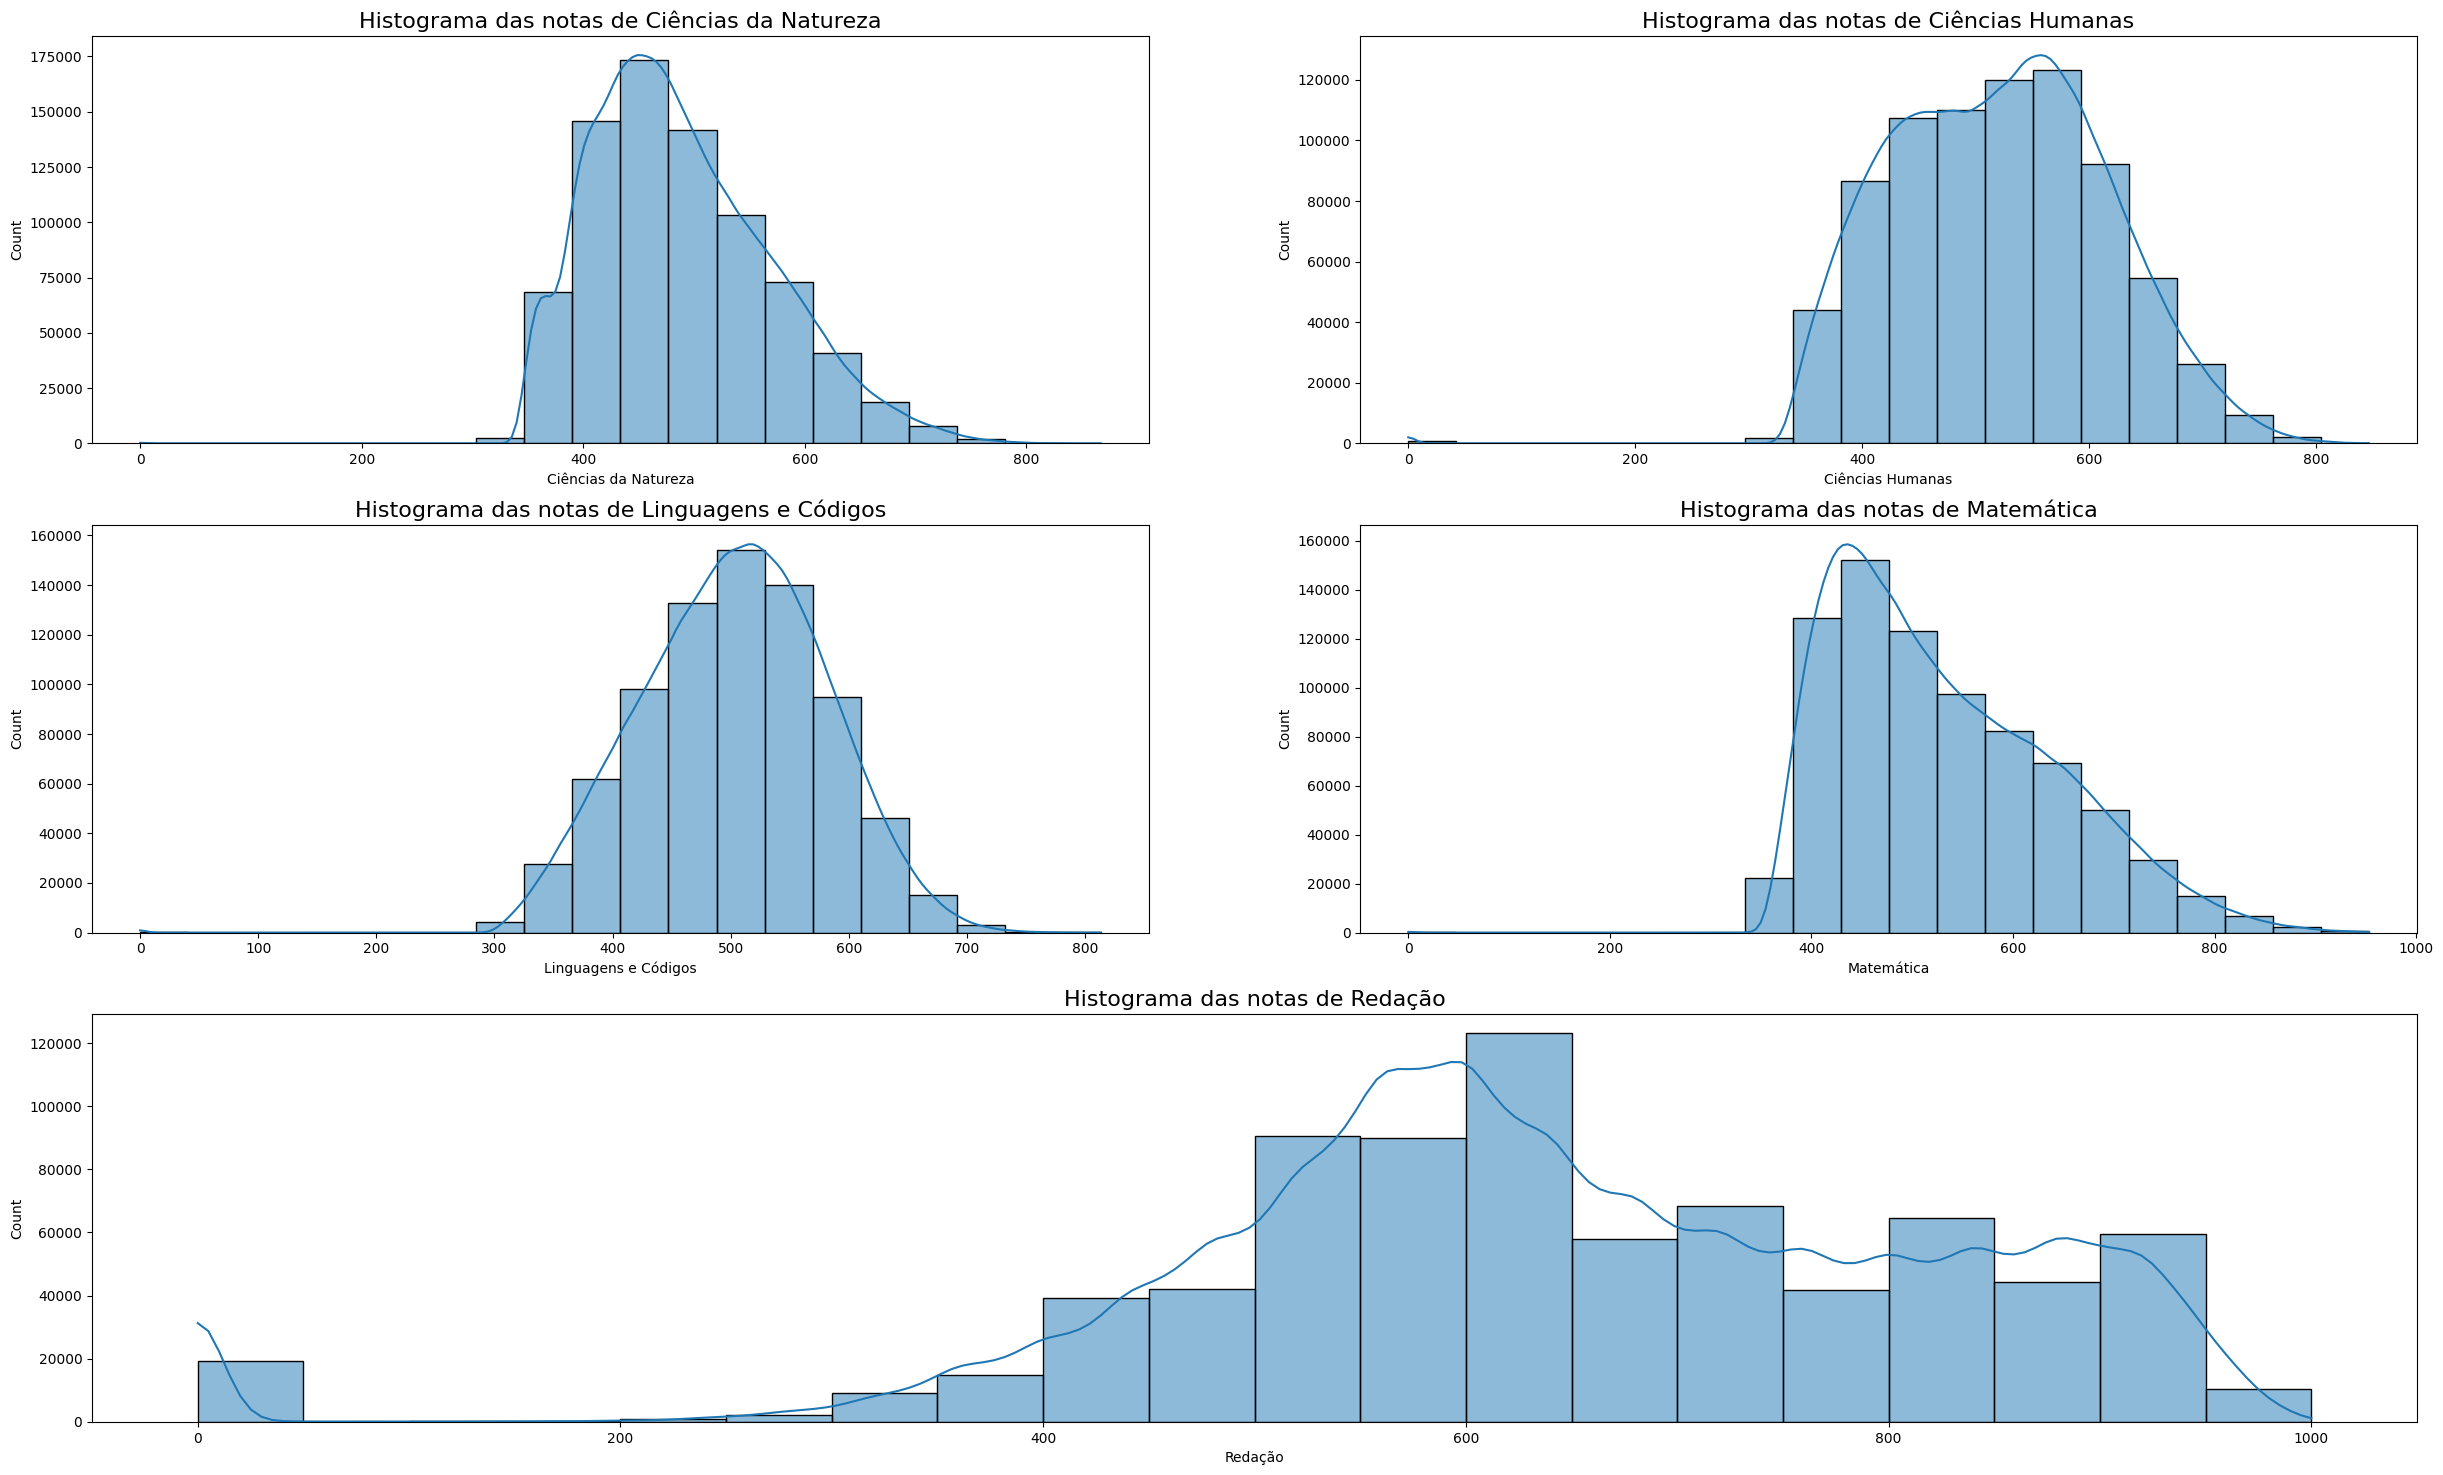

In [62]:
# Dashboard de histogramas para dimensionar os valores das notas. 
fig = plt.figure(figsize=(30,18)) # definindo o tamanho do dashboard
specs= gridspec.GridSpec(nrows= 3, ncols=2, figure=fig) # criando os parametros de linhas, colunas e tamanho dos graficos desse dashboard.

ax1 = fig.add_subplot(specs[0, 0]) # Defininado a posição do grafico no grip
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, 0])
ax4 = fig.add_subplot(specs[1, 1])
ax5 = fig.add_subplot(specs[2, :])

# criando o histograma utilizando como eixo x as notas de cada materia, e adicionando features de auxilio na leitura, como 'kde'
# que cria a linha entre as barras e o 'bins' que defini a quantidade de barras.
sns.histplot(data=data_notas['Ciências da Natureza'], kde=True, bins= 20, ax=ax1).set_title(f'Histograma das notas de {data_col[0]}', fontsize=16) 
sns.histplot(data=data_notas['Ciências Humanas'], kde=True, bins= 20, ax=ax2).set_title(f'Histograma das notas de {data_col[1]}', fontsize=16)
sns.histplot(data=data_notas['Linguagens e Códigos'], kde=True, bins= 20, ax=ax3).set_title(f'Histograma das notas de {data_col[2]}', fontsize=16)
sns.histplot(data=data_notas['Matemática'], kde=True, bins= 20, ax=ax4).set_title(f'Histograma das notas de {data_col[3]}', fontsize=16)
sns.histplot(data=data_notas['Redação'], kde=True, bins= 20, ax=ax5).set_title(f'Histograma das notas de {data_col[4]}', fontsize=16);

### Medida de dispersão 

In [63]:
mad_notas = (data_notas - data_notas.mean()).abs().mean() # verificando o desvio médio absoluto das notas
mad_notas.round(2) # definindo a utilização de apenas duas casas decimais após a virgula.

Ciências da Natureza     65.26
Ciências Humanas         77.45
Linguagens e Códigos     63.16
Matemática               90.91
Redação                 141.46
dtype: float64

In [64]:
var_notas = data_notas.var() # verificando o valor da variancia das notas
var_notas.round(2)

Ciências da Natureza     6524.80
Ciências Humanas         8805.83
Linguagens e Códigos     6087.58
Matemática              12065.86
Redação                 34256.27
dtype: float64

In [65]:
std_notas = data_notas.std() # verificando o valor do desvio padrão das notas
std_notas.round(2)

Ciências da Natureza     80.78
Ciências Humanas         93.84
Linguagens e Códigos     78.02
Matemática              109.84
Redação                 185.08
dtype: float64

### Distribuição de frequências

In [66]:
# função de distribuição de frenquencias dos dados
def values(data, coluna, dado, tipo, ind):
    print(f'dados unicos da coluna {coluna} = {dado.unique()}') # printa os dados unicos da coluna que for selecionada
    df = pd.DataFrame(dado.value_counts()) # conta os dados da coluna seleciona e ordena do maior ao menor
    df.rename(columns={coluna : tipo}, inplace=True) # renomeando a coluna selecionada pelo valor definido pelo usuario
    percent = pd.DataFrame(dado.value_counts(normalize=True) * 100).round(2) # Calculando o percentual que os dados da coluna 
    #'valores' representando no dataset 
    df['Em % (percentual)'] = percent # criando a coluna percentual
    
    return df.rename_axis(ind).reset_index() # retornando a função e redefinindo o nome da coluna "index" para facilitar o entendimento

In [67]:
# distribuição de frequencias da quantidade que cada estado representa no dataset
values(data=data, 
       dado=data['SG_UF_PROVA'],
       coluna = data.columns[11],
       tipo= 'Valores',
       ind = 'Estados')

dados unicos da coluna SG_UF_PROVA = ['AL' 'CE' 'MG' 'BA' 'GO' 'RN' 'PA' 'MT' 'PE' 'MA' 'RO' 'SE' 'PR' 'SP'
 'PB' 'RJ' 'ES' 'RS' 'DF' 'TO' 'PI' 'AM' 'SC' 'AP' 'MS' 'AC' 'RR']


,Estados,Valores,Em % (percentual)
0,SP,103912,13.34
1,CE,73136,9.39
2,MG,69793,8.96
3,BA,63672,8.17
4,RJ,55758,7.16
5,PE,50365,6.47
6,PA,39816,5.11
7,GO,38703,4.97
8,RS,30310,3.89
9,MA,29171,3.74


In [68]:
# distribuição de frequencias dos sexos que realizaram a prova
values(data = data, 
       dado = data['TP_SEXO'],
       coluna = data.columns[3],
       tipo = 'Valores',
       ind = 'Sexos')

dados unicos da coluna TP_SEXO = ['M' 'F']


,Sexos,Valores,Em % (percentual)
0,F,528262,67.82
1,M,250706,32.18


In [69]:
# distribuição de frequencias da quantidade de não treineiros [0] e treineiros [1] no dataset
values(data = data, 
       dado = data['IN_TREINEIRO'],
       coluna = data.columns[10],
       tipo = 'Valores',
       ind = 'Treineiro')

dados unicos da coluna IN_TREINEIRO = [0 1]


,Treineiro,Valores,Em % (percentual)
0,0,680598,87.37
1,1,98370,12.63


In [70]:
# visualização dos dados unicos da tabela faixa etaria
valuess = values(data=data,
       dado = data['TP_FAIXA_ETARIA'],
       coluna= data.columns[2],
       tipo = 'Valores',
       ind='Faixas Etárias')

dados unicos da coluna TP_FAIXA_ETARIA = [12  3  2  8  4  5 11  7 13  1 10  9  6 14 16 15 17 18 19 20]


In [71]:
# Criando no DF a coluna idade que tem informação atribuida com base no valor da coluna "faixa etaria"  
valuess['idade'] = valuess['Faixas Etárias'].apply(
# utilizando o método 'apply' para executar a função de atribuir o valor das linhas da coluna 'idade' com base no valor da coluna 'faixa etaria'
    lambda x: 'Abaixo de 17 anos' if x == 1 else 
              '17 anos' if x == 2 else
              '18 anos' if x == 3 else
              '19 anos' if x == 4 else
              '20 anos' if x == 5 else
              '21 anos' if x == 6 else
              '22 anos' if x == 7 else
              '23 anos' if x == 8 else
              '24 anos' if x == 9 else
              '25 anos' if x == 10 else
              'Entre 26 e 30 anos' if x == 11 else
              'Entre 31 e 35 anos' if x == 12 else
              'Entre 36 e 40 anos' if x == 13 else
              'Entre 41 e 45 anos' if x == 14 else
              'Entre 46 e 50 anos' if x == 15 else
              'Entre 51 e 55 anos' if x == 16 else
              'Entre 56 e 60 anos' if x == 17 else
              'Entre 61 e 65 anos' if x == 18 else
              'Entre 66 e 70 anos' if x == 19 else 'Acima de 70 anos')
 
valuess # Dados ordenados dos valores mais elevados aos mais reduzidos. 

,Faixas Etárias,Valores,Em % (percentual),idade
0,3,215931,27.72,18 anos
1,2,200765,25.77,17 anos
2,4,98886,12.69,19 anos
3,1,60146,7.72,Abaixo de 17 anos
4,5,54298,6.97,20 anos
5,6,32376,4.16,21 anos
6,11,24951,3.20,Entre 26 e 30 anos
7,7,21384,2.75,22 anos
8,8,14567,1.87,23 anos
9,12,12861,1.65,Entre 31 e 35 anos


In [72]:
# calculando quanto as idades "17,18 e 19 anos" representam do total de provas feitas
# count = valuess.loc[valuess['idade'] <= '19 anos']
# count.sum().reset_index()

Text(0.5, 1.0, 'Distribuição das notas de Redação')

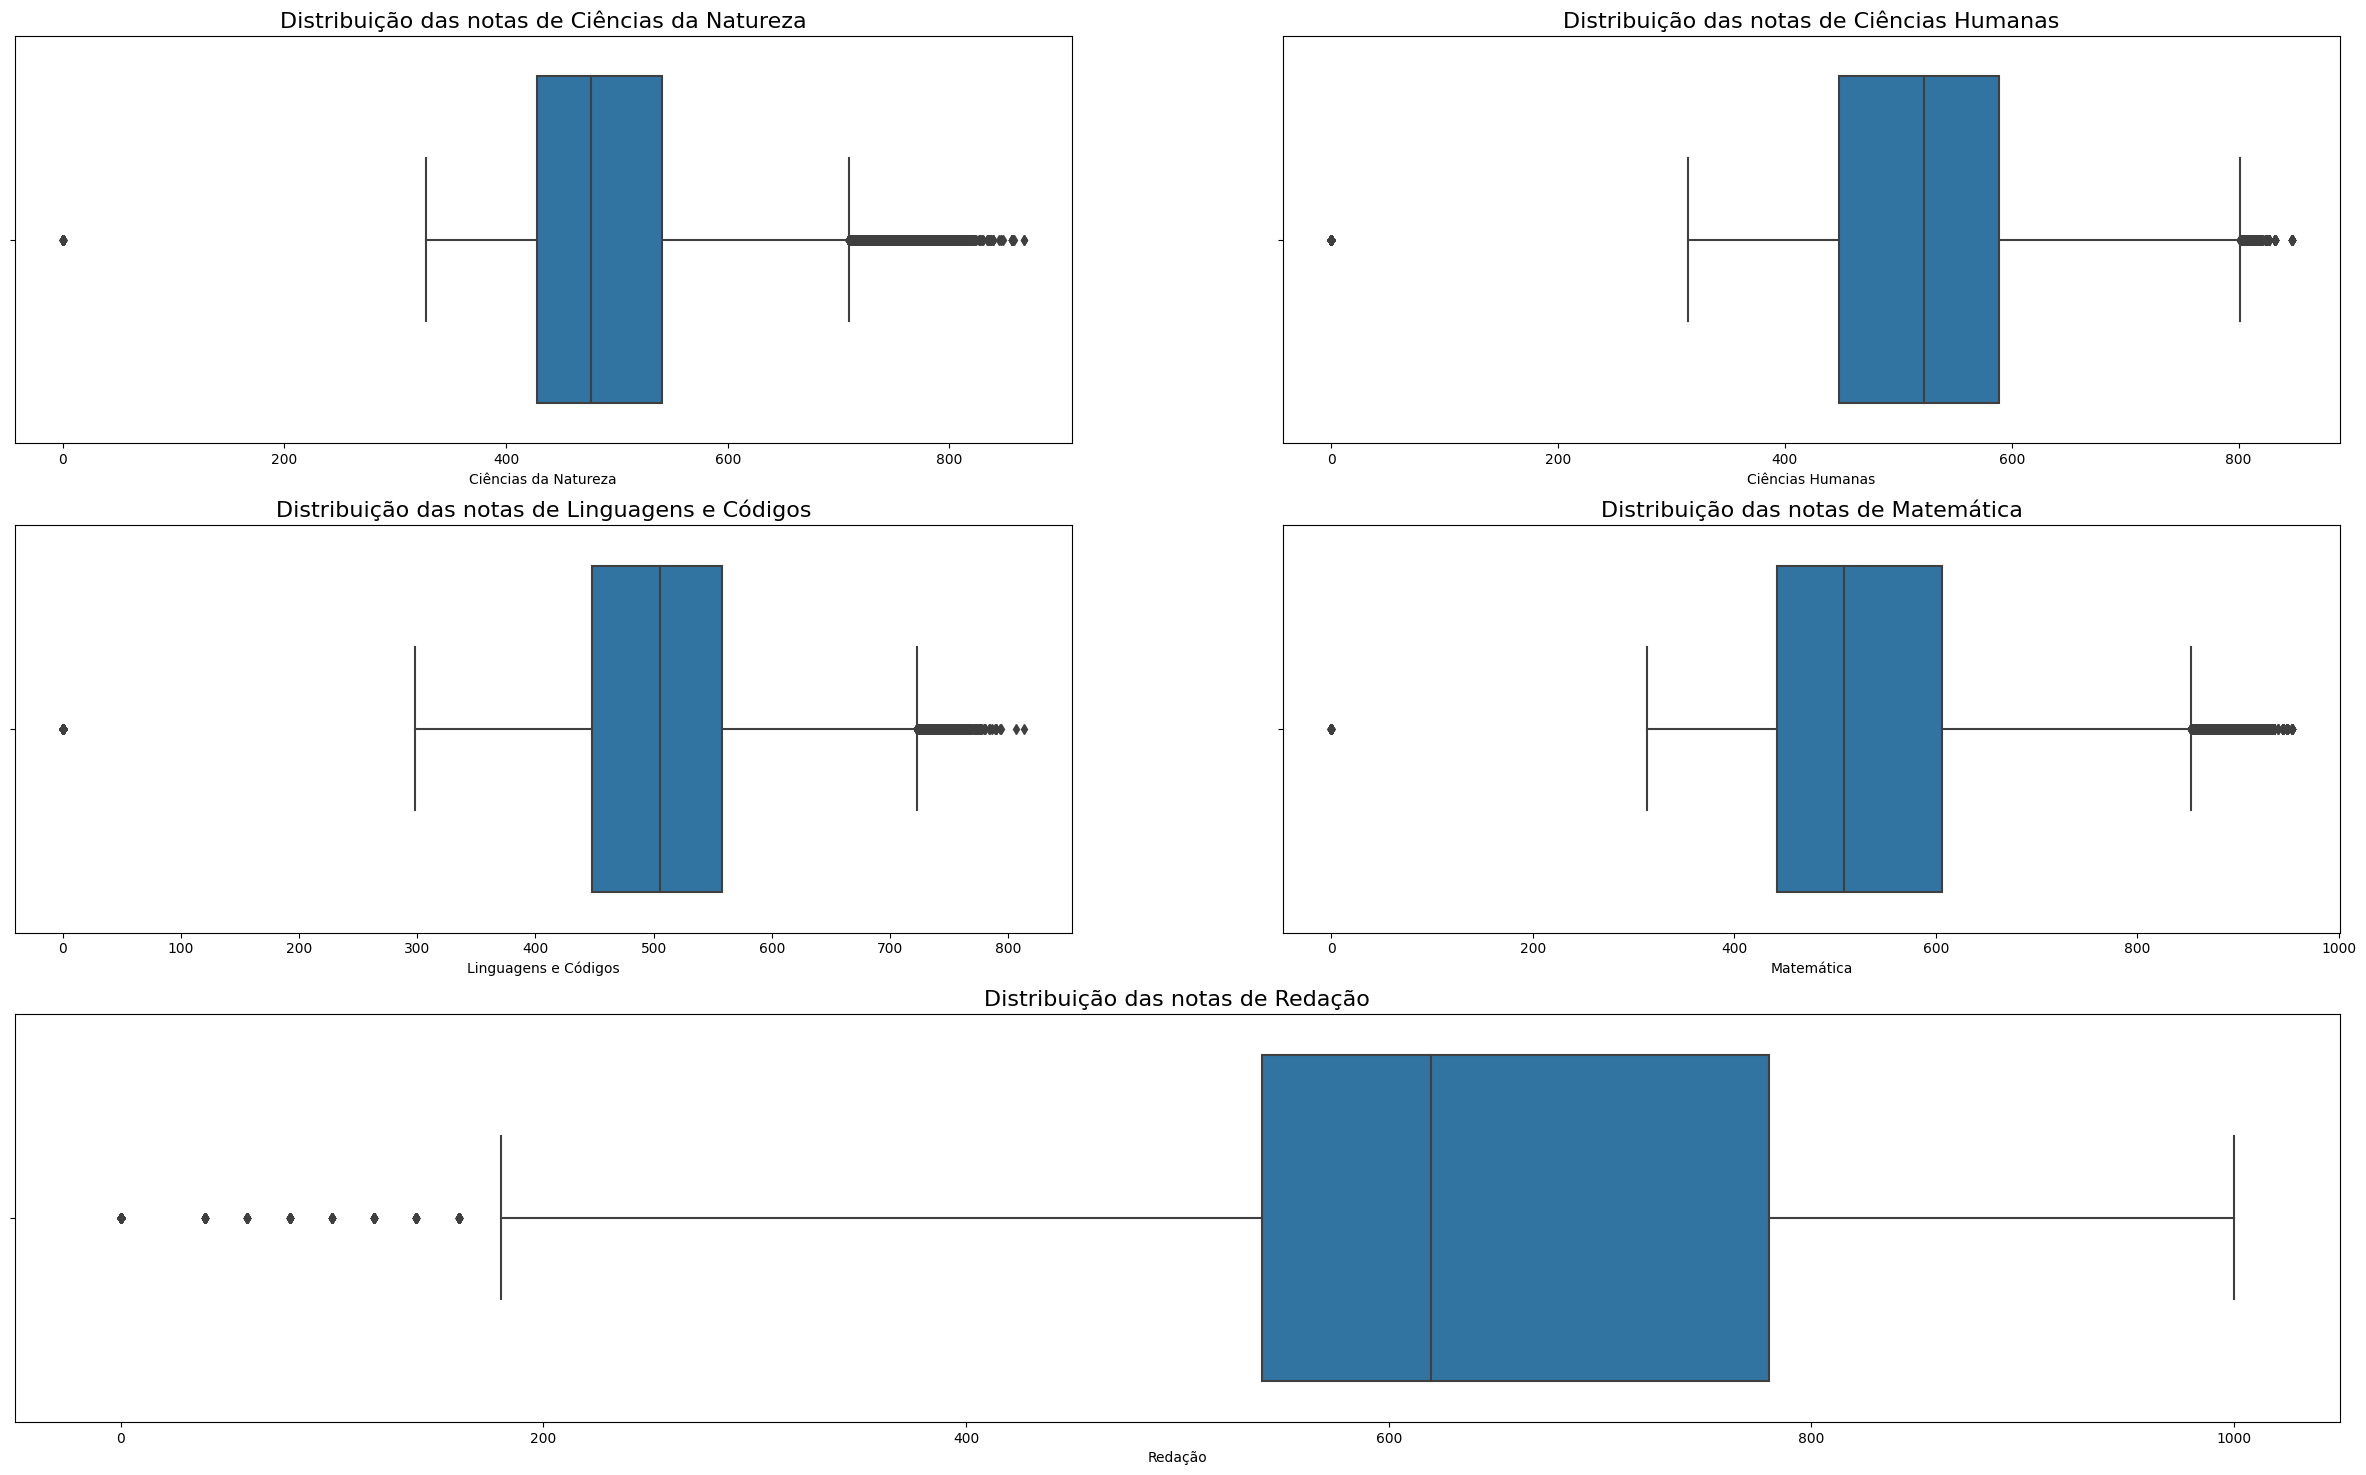

In [73]:
# Plotando um boxplot da distribuição das notas das materias
fig = plt.figure(figsize=(30,18))
specs = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, 0])
ax4 = fig.add_subplot(specs[1, 1])
ax5 = fig.add_subplot(specs[2, :])

sns.boxplot(x = data_notas['Ciências da Natureza'], data=data_notas['Ciências da Natureza'], orient='h', ax=ax1).set_title(f'Distribuição das notas de {data_col[0]}', fontsize=16)
sns.boxplot(x = data_notas['Ciências Humanas'], data=data_notas['Ciências Humanas'], orient='h', ax=ax2).set_title(f'Distribuição das notas de {data_col[1]}', fontsize=16)
sns.boxplot(x = data_notas['Linguagens e Códigos'], data=data_notas['Linguagens e Códigos'], orient='h', ax=ax3).set_title(f'Distribuição das notas de {data_col[2]}', fontsize=16)
sns.boxplot(x = data_notas['Matemática'], data=data_notas['Matemática'], orient='h', ax=ax4).set_title(f'Distribuição das notas de {data_col[3]}', fontsize=16)
sns.boxplot(x = data_notas['Redação'], data=data_notas['Redação'], orient='h',ax=ax5).set_title(f'Distribuição das notas de {data_col[4]}', fontsize=16)

## HIPOTESES

### H1

#### Existe uma diferença significativa entre as notas de homens e mulheres

### H2 

#### Os estados da região Sul tem notas melhores ao restante do país

### H3

#### Os alunos que mais faltam à prova, são os de renda familiar menor

### H4

#### A média de notas está ligada a faixa de renda que o aluno se encontra

### H5

#### Alunos de escola privada possuem melhor performance na prova

## RESOLUÇÃO

### 1. CALCULAR PERCENTUAL MÉDIO DE PONTOS NAS MATÉRIAS DAS PROVAS;

In [74]:
# Filtrando as colunas desejadas
data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,505.9,551.8,498.3,461.5,560.0
3,580.7,678.9,638.9,659.5,780.0
4,497.7,532.4,457.6,582.6,780.0
8,487.4,476.5,450.7,493.4,520.0
9,507.6,539.2,494.6,413.3,380.0


In [75]:
#2. Calculando a média de cada uma das colunas e transformando o resultado como um dataframe filtrado
data_notes = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()

#3. Criando o novo dataframe
data_notas_mean = pd.DataFrame(data_notes)

#4. Criando a coluna notas
data_notas_mean.columns = ['notas'] 

#5. Renomeando os index com o 'set_axis'
data_notas_mean = data_notas_mean.set_axis(['Ciências da natureza','Ciências Humanas','Linguagens e Códigos','Matematica','Redação'], copy=True)
data_notas_mean

,notas
Ciências da natureza,488.322539
Ciências Humanas,521.559648
Linguagens e Códigos,502.894612
Matematica,531.036687
Redação,638.130218


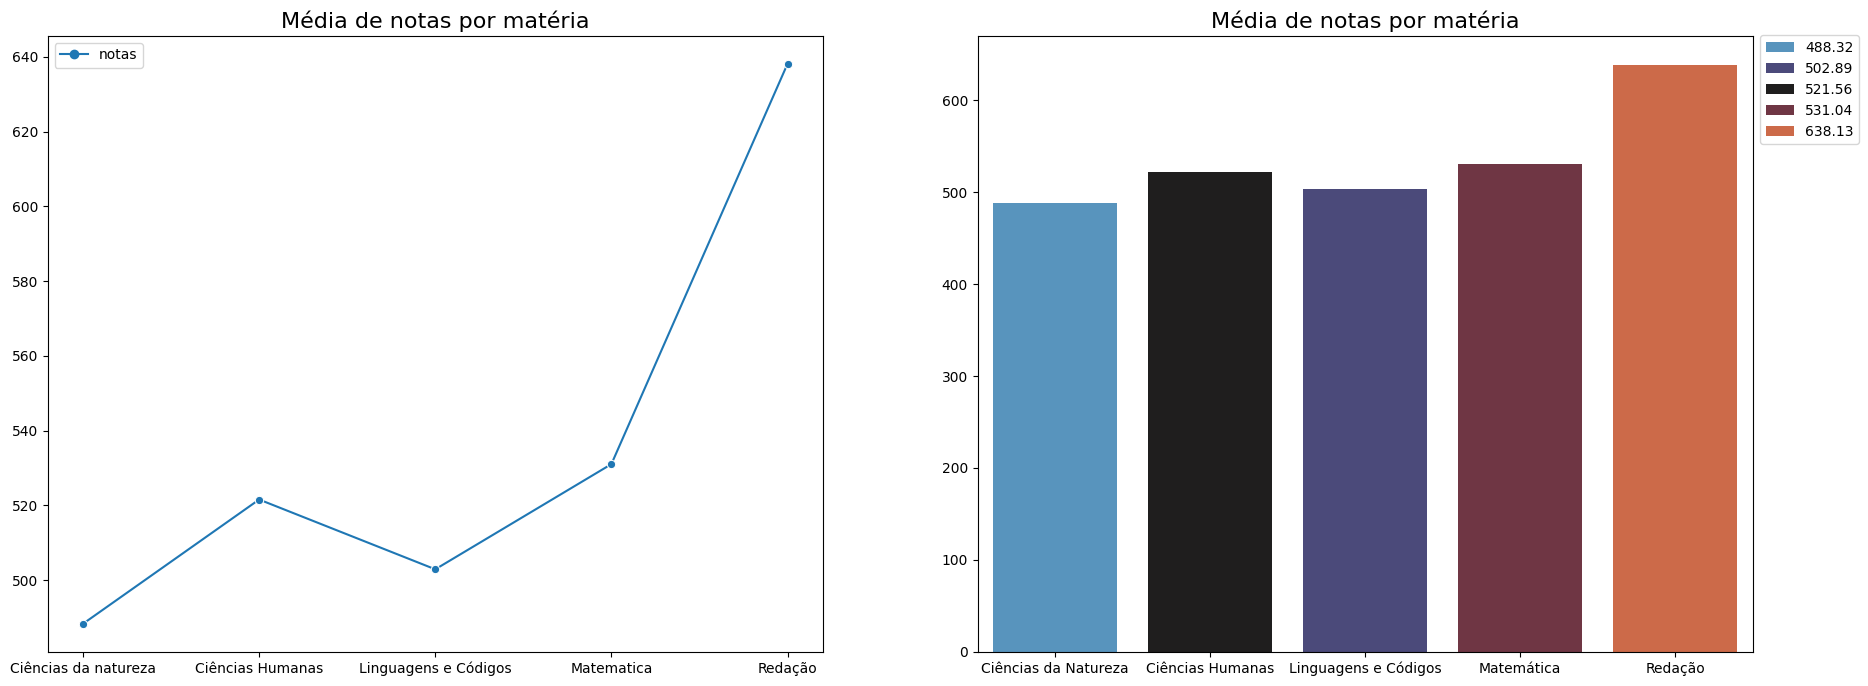

In [76]:
# função de plotar graficos para melhor visualização dos dados
def media_notas(data):
    fig = plt.figure(figsize=(22,8))
    specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    
    ax1 = fig.add_subplot(specs[0, 0])
    ax2 = fig.add_subplot(specs[0, 1])
    
    sns.lineplot(data_notas_mean, markers = True,  ax=ax1).set_title('Média de notas por matéria', fontsize=16);
    
    sns.barplot(y= data_notes, x=data_col, palette="icefire", ax=ax2, hue=data_notes.round(2), dodge=False).set_title(
        'Média de notas por matéria', fontsize=16)
    plt.legend(bbox_to_anchor=(1.001, 1.012))
    
media_notas(data)

### 2. CALCULAR MÉDIA DE NOTAS POR SEXO

In [77]:
#1. Retirando apenas as colunas para utilizar no dashboard
data_column = data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

#2. Renomeando as colunas do df
data_column = data_column.rename(columns={'NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas', 
                                          'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matematica', 'NU_NOTA_REDACAO':'Redação'}, 
                                 copy=True)

#3. Criando a variavel final
data_columns = data_column.columns
data_columns

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matematica', 'Redação'],
      dtype='object')

In [78]:
#4.0 Localizando dados filtrados pela coluna 'SEXO'
#4.1 filtrando dados do sexo masculino
data_masc = data.loc[data['TP_SEXO'] == 'M' ] 

#4.2 filtrando dados do sexo feminino
data_fem = data.loc[data['TP_SEXO'] == 'F' ]

#5. calculando a média de pontos do sexo feminino em todas as matérias
#5.1 criando a variavel 'data_fem' com base na medias das notas do sexo feminino
data_fem = data_fem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()

#5.2 Gerando um DF dos dados
data_fem_mean = pd.DataFrame(data_fem)

#5.3 Criando a coluna notas
data_fem_mean.columns = ['notas']

#5.4 definindo arredondamento de 2 casas decimais para o df
data_fem_mean.round(2)

,notas
NU_NOTA_CN,481.08
NU_NOTA_CH,515.98
NU_NOTA_LC,500.50
NU_NOTA_MT,519.07
NU_NOTA_REDACAO,646.42


In [79]:
#6.0 calculando a média de pontos do sexo masculino em todas as matérias
#6.1 criando a variavel 'data_fem' com base na medias das notas do sexo feminino
data_masc = data_masc[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()

#6.2 Gerando um DF dos dados
data_masc_mean = pd.DataFrame(data_masc) 

#6.3 Criando a coluna notas
data_masc_mean.columns = ['notas']

#6.4 definindo arredondamento de 2 casas decimais para o df
data_masc_mean.round(2)

,notas
NU_NOTA_CN,503.58
NU_NOTA_CH,533.33
NU_NOTA_LC,507.94
NU_NOTA_MT,556.25
NU_NOTA_REDACAO,620.67


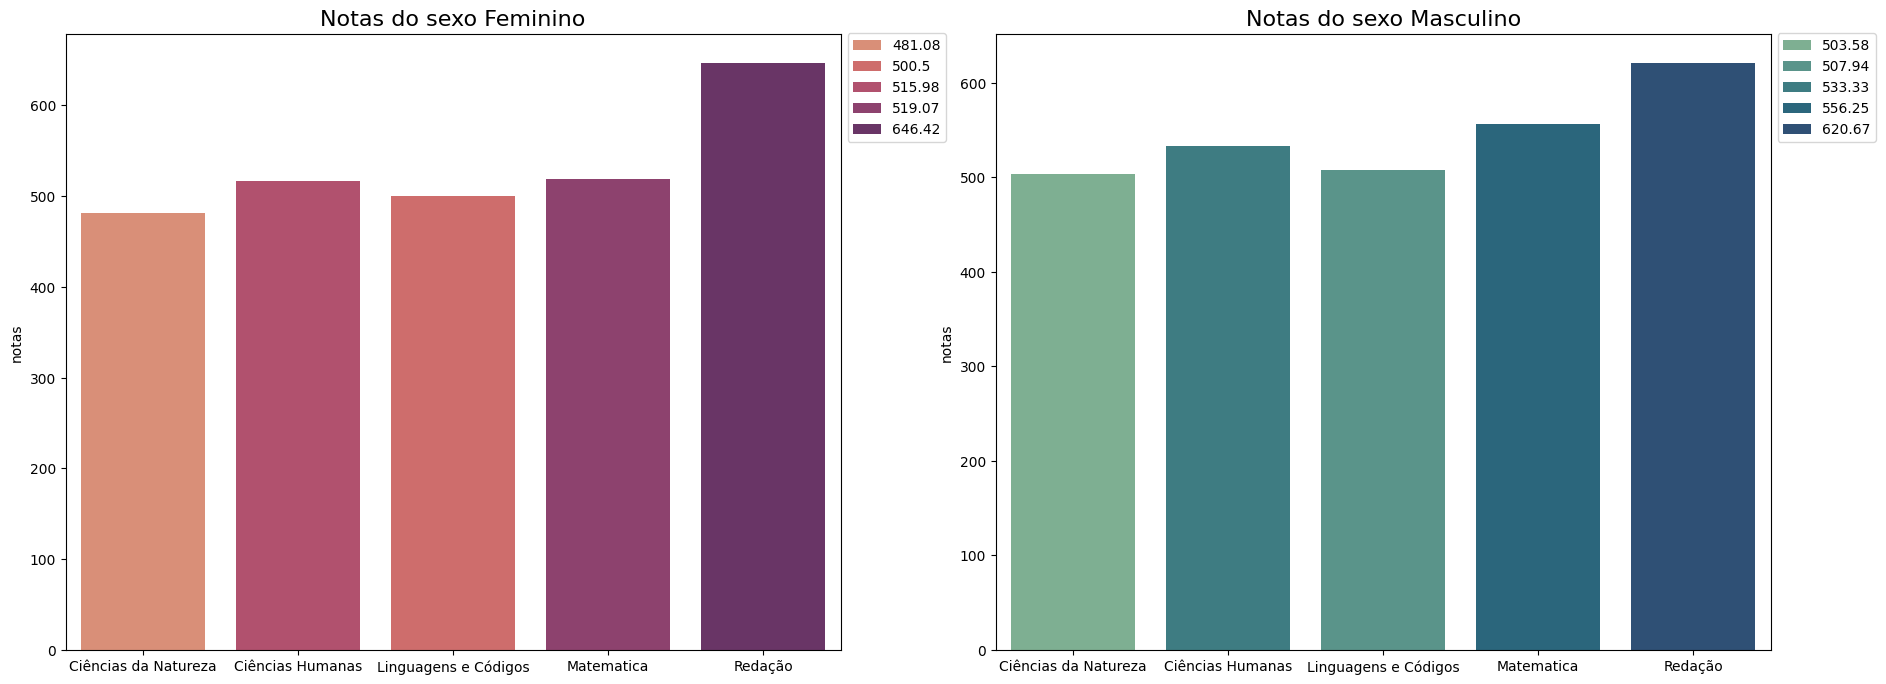

In [80]:
#7. Plotando dashboard para comparação das notas entre masc e fem
fig = plt.figure(figsize=(22,8))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

sns.barplot(y = data_fem_mean['notas'], x=data_columns, ax=ax1, palette='flare',
            hue=data_fem.round(2) , dodge=False).set_title('Notas do sexo Feminino', fontsize=16)
sns.move_legend(ax1, loc='upper right', bbox_to_anchor=(1.145, 1.012))

sns.barplot(y= data_masc_mean['notas'], x=data_columns, ax=ax2, palette="crest", 
            hue=data_masc.round(2), dodge=False).set_title('Notas do sexo Masculino', fontsize=16)
plt.legend(bbox_to_anchor=(1.145, 1.012))

### 3. CONFRONTAR NOTAS ENTRE MASCULINO X FEMININO

In [81]:
#1.Juntando os df's de masculino e feminino e gerando o dataframe do resultado
data_conjuntos = data_fem_mean.merge(data_masc_mean, right_index= True, left_index=True)

#2.Renomeando colunas
data_conjuntos.columns = ['F','M']

#3. Criar a coluna 'Diferenças em % (default 100%)' com base no calculo de '(data_fem_mean / data_masc_mean) * 100)'
data_conjuntos['Diferenças em % (default 100%)'] = (((data_fem_mean / data_masc_mean) * 100)).round(2)

#4. Juntando em um DF
data_conjunto = pd.DataFrame(data_conjuntos)
data_conjunto

,F,M,Diferenças em % (default 100%)
NU_NOTA_CN,481.082679,503.577628,95.53
NU_NOTA_CH,515.975705,533.325561,96.75
NU_NOTA_LC,500.500463,507.939316,98.54
NU_NOTA_MT,519.072629,556.246126,93.32
NU_NOTA_REDACAO,646.418444,620.666119,104.15


In [82]:
#5 Calculando a diferença média entre homens e mulheres
data_dif_MxF = (data_conjuntos['M'] / data_conjuntos['F'] * 100) - 100
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_MxF.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.54%


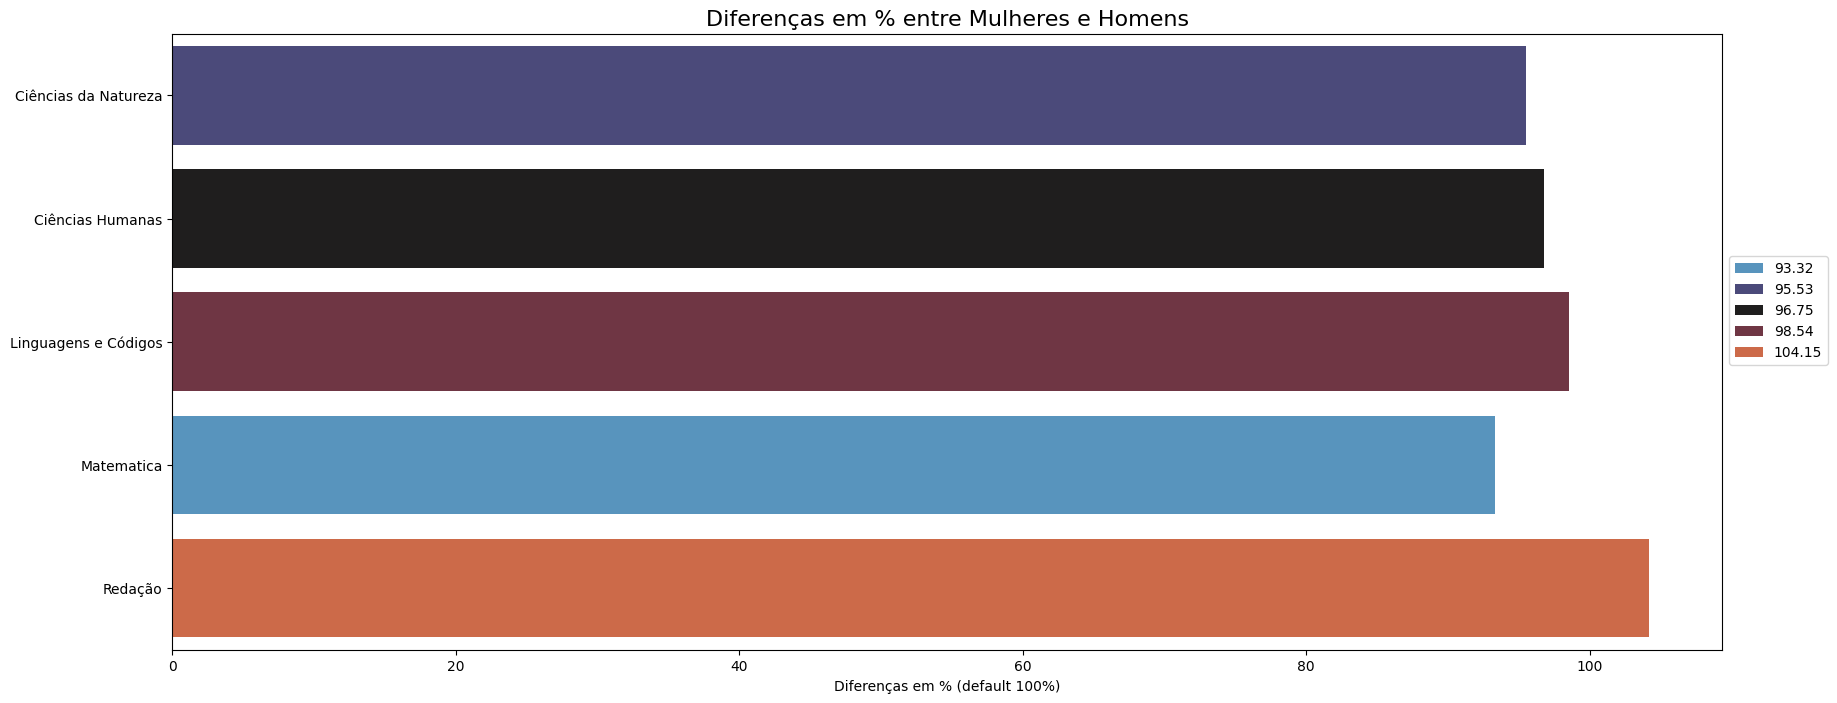

In [83]:
#5. Plotando o grafico das notas por sexo
plt.figure(figsize=(20,8))
sns.barplot(x=data_conjunto['Diferenças em % (default 100%)'], y=data_columns, palette="icefire", 
            hue=data_conjunto['Diferenças em % (default 100%)'].round(2), dodge=False).set_title('Diferenças em % entre Mulheres e Homens', fontsize=16)
plt.legend(bbox_to_anchor=(1.0725, 0.65));

### 4. CALCULAR MÉDIA DE NOTAS POR ESTADOS/REGIÃO

In [84]:
# 1. Criar a variavel 'data_uf' com os dados de uf da prova do dataset
data_uf = data[['SG_UF_PROVA']]

#2. Renomeando a coluna para 'uf'
data_uf= data_uf.rename(columns={'SG_UF_PROVA' : 'UF'}, copy=True)

#3. Criando a variavel 'data_notas_uf' com a junção do 'data_notas' e 'data_uf'
data_notas_uf = data_notas.merge(data_uf, left_index=True, right_index=True)

#4. Criando a variavel 'data_uf_notas_grup' com o agrupámento por uf da varivael 'data_notas_uf' 
data_uf_notas_group = data_notas_uf.groupby('UF').mean()

#5. Resetendo os index da variavel
data_uf_notas = data_uf_notas_group.reset_index()

#6. Ordenando os dados do df por uf em ordem alfabetica
data_uf_notas.sort_index(ascending=True).head()

,UF,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
0,AC,470.058541,503.698251,486.787161,498.092749,609.319684
1,AL,474.556547,505.022599,486.660143,515.544432,637.323025
2,AM,459.863753,488.680507,475.973054,487.385657,570.037138
3,AP,465.430529,499.171251,475.970714,491.329505,605.047549
4,BA,477.330406,508.889169,490.161620,511.634481,630.019475


In [85]:
#7. Criando as variaveis com as regioes do pais utilizando os estados de valores para essas variaveis
Norte = ['AM','RR','AP','AC','RO','PA','TO']
Sul = ['RS','SC','PR']
Sudeste=['SP','MG','ES','RJ']
Centro_Oeste = ['MT','GO','DF','MS']
Nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']

In [86]:
#8. Nova coluna 'média' agrupada pela média das notas por uf
data_uf_notas['Médias'] = data_uf_notas.UF.apply(lambda x: (data_uf_notas.loc[data_uf_notas['UF'] == x].mean().sum() / 5).round(2))

#9. Nova variavel 'regiao' definida pela função que defini a regiao do pais com base no estado do index.
data_uf_notas['Região'] = data_uf_notas.UF.apply(
    lambda x: 'Norte' if x in Norte else 
              'Sul' if x in Sul else
              'Sudeste' if x in Sudeste else
              'Nordeste' if x in Nordeste else
              'Centro Oeste' if x in Centro_Oeste else 'NA')
   
#10. Ordenando os dados descendentemente pela coluna 'média'
data_uf_notas.sort_values('Médias', ascending=False).round(2)

C:\Users\Savio\AppData\Local\Temp\ipykernel_21136\1389354921.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_uf_notas['Médias'] = data_uf_notas.UF.apply(lambda x: (data_uf_notas.loc[data_uf_notas['UF'] == x].mean().sum() / 5).round(2))


,UF,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Médias,Região
10,MG,512.28,548.68,525.59,567.12,685.60,567.86,Sudeste
25,SP,510.92,550.37,531.99,565.58,658.65,563.50,Sudeste
23,SC,510.50,546.15,521.29,559.56,655.45,558.59,Sul
22,RS,504.41,544.35,523.54,552.02,658.75,556.61,Sul
6,DF,505.70,542.59,523.52,549.03,646.86,553.54,Centro Oeste
18,RJ,499.31,539.02,519.44,546.51,661.21,553.10,Sudeste
7,ES,504.59,535.92,514.51,550.45,659.05,552.90,Sudeste
17,PR,501.23,537.10,517.02,545.88,632.17,546.68,Sul
19,RN,490.73,521.43,499.98,529.50,650.14,538.36,Nordeste
12,MT,484.51,515.97,494.22,524.14,627.42,529.25,Centro Oeste


In [87]:
#11. Retirando as colunas 'médias' e 'regiao', agrupando por 'região' e ordendo de maneira descendente pela média 
data_uf_notas[['Médias','Região']].groupby('Região').mean().sort_values('Médias', ascending=False).reset_index()

,Região,Médias
0,Sudeste,559.34
1,Sul,553.96
2,Centro Oeste,533.35
3,Nordeste,523.03
4,Norte,511.11


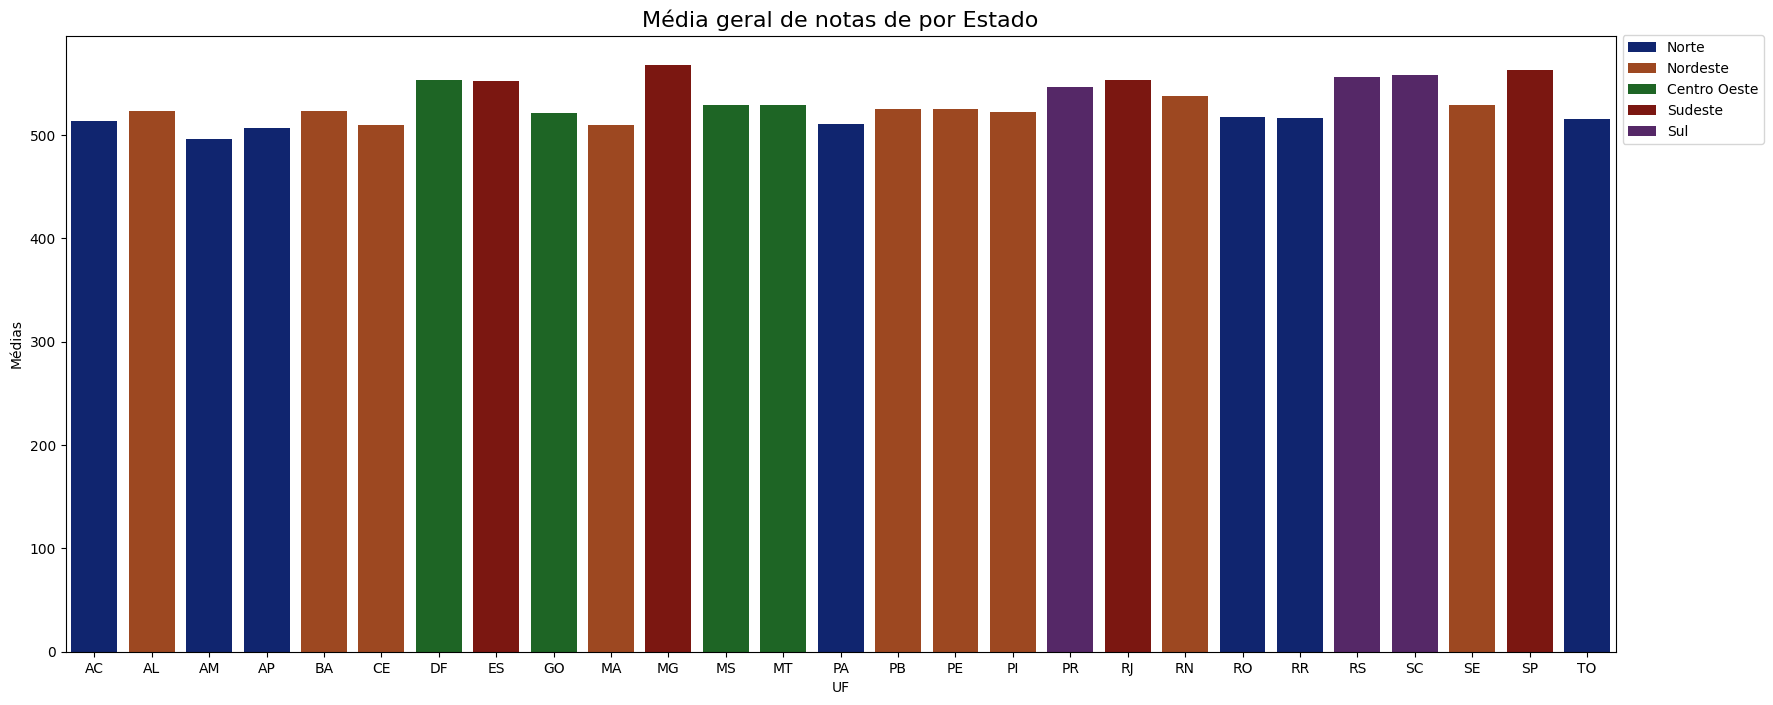

In [88]:
#12. Plotando o grafico das notas por uf
plt.figure(figsize=(20,8))
sns.barplot(y = data_uf_notas['Médias'], x = data_uf_notas.UF.sort_values(ascending=True), palette='dark', 
            hue=data_uf_notas['Região'], dodge=False).set_title('Média geral de notas de por Estado', fontsize=16);
plt.legend(bbox_to_anchor=(1, 1.012))

### 5. COMPARAR NOTAS POR UF; 

<Figure size 3000x1800 with 0 Axes>

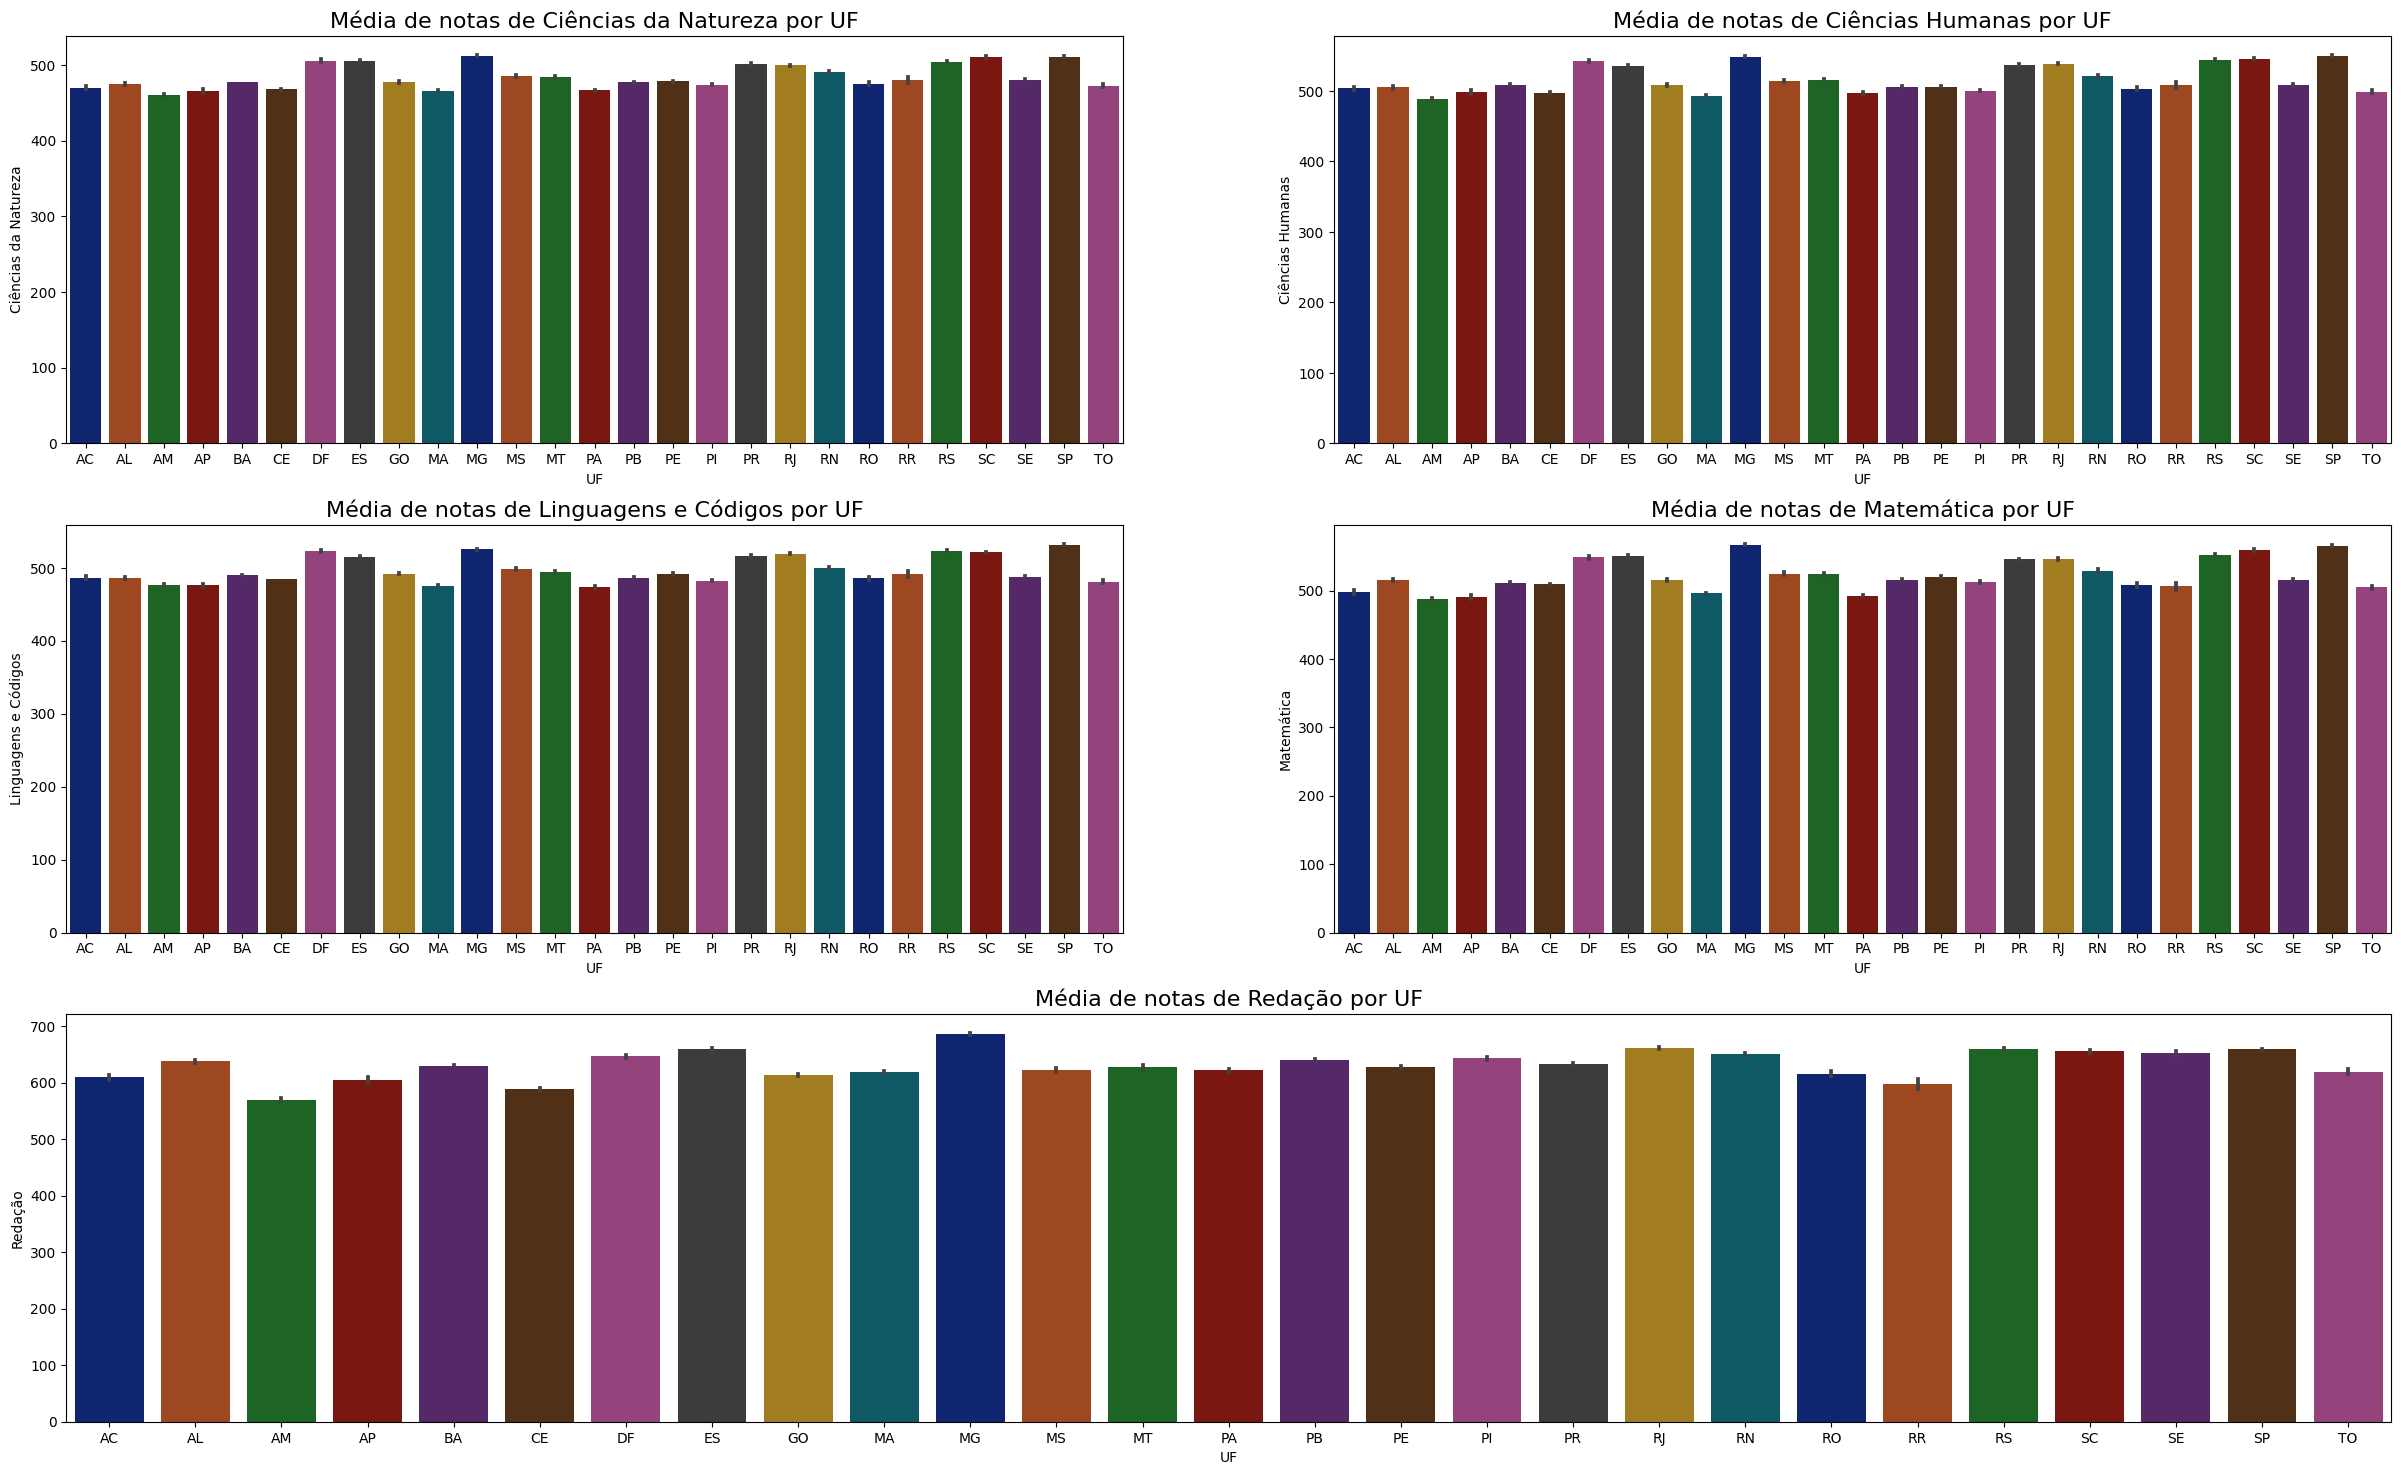

In [89]:
#1. Plotando um dashboard comparando as notas de todas as matérias por estado
plt.figure(figsize=(30,18))

fig = plt.figure(figsize=(30,18))
specs = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
                
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, 0])
ax4 = fig.add_subplot(specs[1, 1])
ax5 = fig.add_subplot(specs[2, :])

sns.barplot(y = data_notas['Ciências da Natureza'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax1).set_title(f'Média de notas de {data_col[0]} por UF', fontsize=16) 
sns.barplot(y = data_notas['Ciências Humanas'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax2).set_title(f'Média de notas de {data_col[1]} por UF', fontsize=16)
sns.barplot(y = data_notas['Linguagens e Códigos'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax3).set_title(f'Média de notas de {data_col[2]} por UF', fontsize=16)
sns.barplot(y = data_notas['Matemática'], x = data_uf.UF.sort_values(ascending=True), palette='dark',
            dodge=False, ax=ax4).set_title(f'Média de notas de {data_col[3]} por UF', fontsize=16)
sns.barplot(y = data_notas['Redação'], x = data_uf.UF.sort_values(ascending=True), palette='dark', 
            dodge=False, ax=ax5).set_title(f'Média de notas de {data_col[4]} por UF', fontsize=16);

### 6. CALCULAR PERCENTUAL DE ALUNOS FALTANTES

#### 6.1 POR ESTADO

In [90]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,...,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Idade
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,...,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,20 anos
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,Entre 31 e 35 anos
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,Entre 36 e 40 anos
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,...,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,18 anos
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,17 anos


In [91]:
#1. Renomeando as colunas do df 'dados'
dados.rename(columns = {'TP_PRESENCA_CN': 'Presença em ciências da natureza','TP_PRESENCA_CH':'Presença em ciências humanas',
                        'TP_PRESENCA_LC': 'Presença em linguagens e códigos',
                        'TP_PRESENCA_MT':'Presença em matemática', 'SG_UF_PROVA':'UF'}, inplace=True),
dados[['Presença em ciências da natureza','Presença em ciências humanas',
       'Presença em linguagens e códigos','Presença em matemática']].head()

,Presença em ciências da natureza,Presença em ciências humanas,Presença em linguagens e códigos,Presença em matemática
0,0,1,1,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1


In [92]:
#2. Variavel 'dados_presence_cn' com base em localização dos 'dados['Presença em ciências da natureza'] == 0 (faltantes)' e contando os valores descendentemente
dados_presence_cn = pd.DataFrame(dados[['Presença em ciências da natureza','UF']].loc[dados['Presença em ciências da natureza'] == 0].value_counts(ascending=False))

#3. Sorteando os dados pelo estado de maneira ascendente
dados_presence_cn.sort_index(ascending=True).head()

0
Presença em ciências da natureza UF       
0                                AC   1679
                                 AL   4178
                                 AM   5995
                                 AP   1623
                                 BA  20306

In [93]:
#4. Variavel 'dados_presence_ch' com base em localização dos 'dados['Presença em ciências humanas'] == 0 (faltantes)' e contando os valores descendentemente
dados_presence_ch = pd.DataFrame(dados[['Presença em ciências humanas','UF']].loc[dados['Presença em ciências humanas'] == 0].value_counts(ascending=False))

#5. Sorteando os dados pelo estado de maneira ascendente
dados_presence_ch.sort_index(ascending=True).head()

0
Presença em ciências humanas UF       
0                            AC   1396
                             AL   3534
                             AM   5004
                             AP   1357
                             BA  17379

In [94]:
#6. Variavel 'dados_presence_lc' com base em localização dos 'dados['Presença em linguagens e códigos'] == 0 (faltantes)' e contando os valores descendentemente
dados_presence_lc = pd.DataFrame(dados[['Presença em linguagens e códigos','UF']].loc[dados['Presença em linguagens e códigos'] == 0].value_counts(ascending=False))

#7. Sorteando os dados pelo estado de maneira ascendente
dados_presence_lc.sort_index(ascending=True).head()

0
Presença em linguagens e códigos UF       
0                                AC   1396
                                 AL   3534
                                 AM   5004
                                 AP   1357
                                 BA  17379

In [95]:
#8. Variavel 'dados_presence_mt' com base em localização dos 'dados['Presença em matemática'] == 0 (faltantes)' e contando os valores descendentemente
dados_presence_mt = pd.DataFrame(dados[['Presença em matemática','UF']].loc[dados['Presença em matemática'] == 0].value_counts(ascending=False))
dados_presence_mt.sort_index(ascending=True).head()

0
Presença em matemática UF       
0                      AC   1679
                       AL   4178
                       AM   5995
                       AP   1623
                       BA  20306

In [96]:
#9. Juntando os df's 'dados_presence_cn' e 'dados_presence_mt'
dados_cn_mt = dados_presence_cn.merge(dados_presence_mt, right_index=True, left_index=True)

#10. Juntando os df's 'dados_presence_ch' e 'dados_presence_lc'
dados_ch_lc = dados_presence_ch.merge(dados_presence_lc, right_index=True, left_index=True)

#10. Juntando os df's 'dados_cn_mt' e 'dados_ch_lc'
dados_all_mat = dados_cn_mt.merge(dados_ch_lc, right_index=True, left_index=True)

#11. Dropando as colunas excedentes
dados_all_mat.drop(columns=['0_y_x', '0_x_y'], inplace=True)

#12. Renomeando as colunas resultado
dados_all_mat.rename(columns={'0_x_x':'CN | MT', '0_y_y':'CH | LC'}, inplace=True)

#13. Ordenando os dados pelo uf de maneira ascendente e resetando seus index
dados_all_mat.sort_index(ascending=True).reset_index()

,UF,Presença em ciências da natureza,Presença em matemática,Presença em ciências humanas,Presença em linguagens e códigos,CN | MT,CH | LC
0,AC,0,0,0,0,1679,1396
1,AL,0,0,0,0,4178,3534
2,AM,0,0,0,0,5995,5004
3,AP,0,0,0,0,1623,1357
4,BA,0,0,0,0,20306,17379
5,CE,0,0,0,0,29505,25888
6,DF,0,0,0,0,5271,4538
7,ES,0,0,0,0,5065,4218
8,GO,0,0,0,0,22047,19663
9,MA,0,0,0,0,9394,7991


#### 6.2 POR SEXO

In [97]:
#1. Renomeando as colunas do df 'dados'
dados.rename(columns={'TP_SEXO':'Sexo'}, inplace=True) # renomeando coluna de sexo

In [98]:
#1.1 teste de validação da renomeação da coluna
dados.head() 

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,Sexo,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,UF,Presença em ciências da natureza,Presença em ciências humanas,Presença em linguagens e códigos,Presença em matemática,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,...,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Idade
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,...,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,20 anos
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,Entre 31 e 35 anos
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,Entre 36 e 40 anos
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,...,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,18 anos
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,17 anos


In [99]:
#2. agrupando coluna sexo e presença na matéria de ciências da natureza, e localizando apenas as linhas 
#que contenham presença na matéria igual a 0 ( 0 = aluno faltante)
dados_cn_mt_sex =dados[['Sexo','Presença em ciências da natureza']].loc[dados['Presença em ciências da natureza'] == 0] 

#3. contando os valores para Masculino e Feminino e transformando de serie para DataFrame.
dados_cn_mt_sex = pd.DataFrame(dados_cn_mt_sex.value_counts()) 

#4. Renomeando a coluna 0 para 'Presença em CN/MT'
dados_cn_mt_sex.rename(columns={0: 'Presença em CN/MT'}, inplace=True)

#5. Resetando o index do df
dados_cn_mt_sex.reset_index()

,Sexo,Presença em ciências da natureza,Presença em CN/MT
0,F,0,177922
1,M,0,88915


In [100]:
#6. agrupando coluna sexo e presença na matéria de ciências humanas, e localizando apenas as linhas 
#que contenham presença na matéria igual a 0 ( 0 = aluno faltante)
dados_ch_lc_sex =dados[['Sexo','Presença em ciências humanas']].loc[dados['Presença em ciências humanas'] == 0]

#7. contando os valores para Masculino e Feminino e transformando de serie para DataFrame.
dados_ch_lc_sex = pd.DataFrame(dados_ch_lc_sex.value_counts()) 

#8. Renomeando a coluna 0 para 'Presença em CH/LC'
dados_ch_lc_sex.rename(columns={0: 'Presença em CH/LC'}, inplace=True)

#9. Resetando o index do df
dados_ch_lc_sex.reset_index()

,Sexo,Presença em ciências humanas,Presença em CH/LC
0,F,0,151022
1,M,0,76968


In [101]:
#10. Juntando os df's 'dados_cn_mt_sex' e 'dados_ch_lc_sex'
dados_all_sex = dados_cn_mt_sex.merge(dados_ch_lc_sex, right_index=True, left_index=True)

#11. Resetando o index do df
dados_all_sex.reset_index(inplace=True)

#12. Dropando as colunas 'Presença em ciências da natureza' e 'Presença em ciências humanas'
dados_all_sex.drop(columns=['Presença em ciências da natureza','Presença em ciências humanas'], inplace=True)
dados_all_sex

,Sexo,Presença em CN/MT,Presença em CH/LC
0,F,177922,151022
1,M,88915,76968


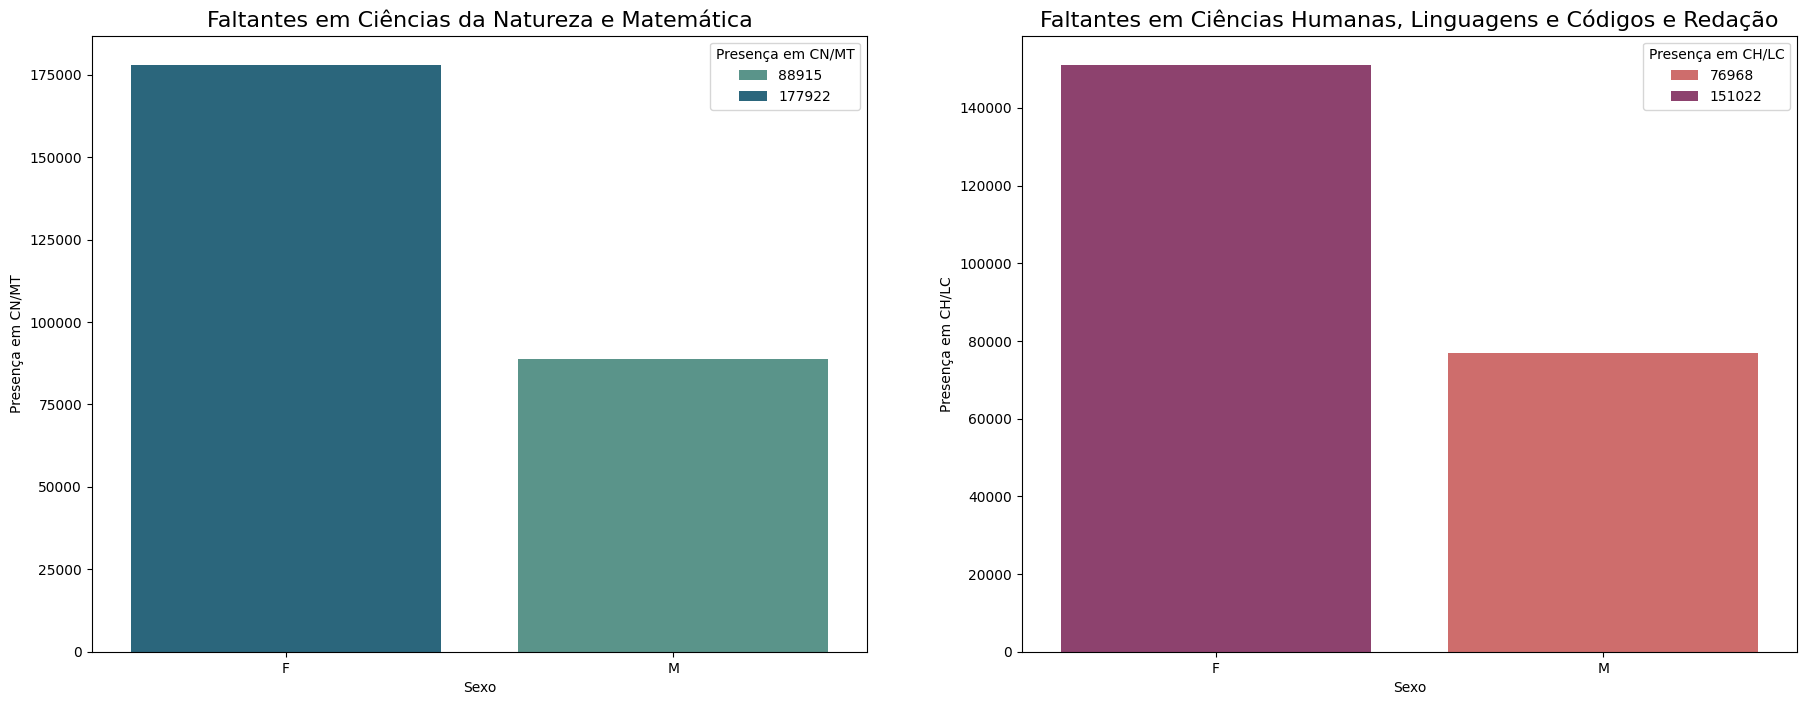

In [102]:
#13. Plotando os resultados referente a 'Presença em CN/MT' e 'Presença em CH/LC'
fig = plt.figure(figsize=(22,8))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

sns.barplot(y = dados_all_sex['Presença em CN/MT'], x=dados_all_sex['Sexo'], ax=ax1, palette='crest', dodge=False, 
            hue=dados_all_sex['Presença em CN/MT']).set_title('Faltantes em Ciências da Natureza e Matemática', fontsize=16);
# sns.move_legend(ax1, loc='upper right', bbox_to_anchor=(1.145, 1.012)) # código usado em um teste com legenda

sns.barplot(y= dados_all_sex['Presença em CH/LC'], x=dados_all_sex['Sexo'], ax=ax2, palette="flare", dodge=False,
            hue=dados_all_sex['Presença em CH/LC']).set_title('Faltantes em Ciências Humanas, Linguagens e Códigos e Redação', fontsize=16);
# plt.legend(bbox_to_anchor=(1.145, 1.012)); # código usado em um teste com legenda

#### 6.3 POR FAIXA ETARIA

In [103]:
#1. Variavel 'dados_faixa_etaria' com os dados das colunas 'Presença em ciências da natureza', 'Presença em ciências humanas' e Idade'
dados_faixa_etaria = dados[['Presença em ciências da natureza', 'Presença em ciências humanas','Idade']]

#2. Criando a variavel 'dados_cn_faixa' com a tranformação da variavel 'dados_faixa_etaria' em df, dropando a coluna 
#'Presença em ciências humanas', localizando os valores iguais a 0 na coluna 'Presença em ciências da natureza' e contando os valores
dados_cn_faixa = pd.DataFrame(dados_faixa_etaria.drop(
    columns='Presença em ciências humanas').loc[dados_faixa_etaria['Presença em ciências da natureza'] == 0].value_counts())

#3. Resetando o index da variavel
dados_cn_faixa.reset_index(inplace=True)
dados_cn_faixa = dados_cn_faixa.rename(columns={0: 'Faltantes'}, copy=True)
dados_cn_faixa

,Presença em ciências da natureza,Idade,Faltantes
0,0,18 anos,56084
1,0,19 anos,38831
2,0,17 anos,32343
3,0,20 anos,25670
4,0,Entre 26 e 30 anos,20783
5,0,21 anos,17791
6,0,22 anos,12952
7,0,Entre 31 e 35 anos,11150
8,0,23 anos,9673
9,0,Abaixo de 17 anos,8644


In [104]:
#4. Criando a variavel 'dados_ch_faixa' com a tranformação da variavel 'dados_faixa_etaria' em df, dropando a coluna 
#'Presença em ciências da natureza', localizando os valores iguais a 0 na coluna 'Presença em ciências humanas' e contando os valores
dados_ch_faixa = pd.DataFrame(dados_faixa_etaria.drop(
    columns='Presença em ciências da natureza').loc[dados_faixa_etaria['Presença em ciências humanas'] == 0].value_counts())

#5. Resetando o index da variavel
dados_ch_faixa.reset_index(inplace=True)
dados_ch_faixa = dados_ch_faixa.rename(columns={0: 'Faltantes'}, copy=True)
dados_ch_faixa

,Presença em ciências humanas,Idade,Faltantes
0,0,18 anos,46509
1,0,19 anos,33650
2,0,17 anos,24872
3,0,20 anos,22677
4,0,Entre 26 e 30 anos,18920
5,0,21 anos,15774
6,0,22 anos,11518
7,0,Entre 31 e 35 anos,10179
8,0,23 anos,8714
9,0,24 anos,7521


#### 6.4 GRAU SOCIOECONOMICO.

In [105]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,Sexo,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,UF,Presença em ciências da natureza,Presença em ciências humanas,Presença em linguagens e códigos,Presença em matemática,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,...,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Idade
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,...,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,20 anos
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,Entre 31 e 35 anos
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,Entre 36 e 40 anos
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,...,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,18 anos
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,17 anos


In [106]:
#1. Variavel 'dados_falta_socio' com os dados das colunas 'Presença em ciências da natureza', 'Presença em ciências humanas' e 'Q006'
dados_falta_socio = dados[['Presença em ciências da natureza','Presença em ciências humanas','Q006']]

#2. Renomeando as colunas do df
dados_falta_socio = dados_falta_socio.rename(
    columns={'Presença em ciências da natureza': 'Presença em CN/MT',
             'Presença em ciências humanas': 'Presença em CH/LC/REDAÇÃO','Q006':'Faixa de renda'}, copy=True);

#3. Variavel 'dados_falta_socio_exatas' com a transformação da 'dados_falta_socio' em df, dropando a colunas 'Presença em CH/LC/REDAÇÃO', 
#localizando os valores iguais a 0 na coluna 'Presença em CN/MT' e contando os valores
dados_falta_socio_exatas = pd.DataFrame(dados_falta_socio.drop(
    columns= 'Presença em CH/LC/REDAÇÃO').loc[dados_falta_socio['Presença em CN/MT'] == 0].value_counts(ascending=False))

#4. Resetando os index do df
dados_falta_socio_exatas.reset_index(inplace=True)

#5. Juntando 'dados_falta_socio_exatas' com 'data_socioeconomico['Renda']'
dados_falta_socio_exatas = dados_falta_socio_exatas.merge(data_socioeconomico['Renda'], left_index=True, right_index=True).reset_index()

#6. Dropando as colunas 'index' e 'Faixa de renda'
dados_falta_socio_exatas.drop(columns=['index','Faixa de renda'], inplace=True)

#7. Renomeando a coluna 0 para 'Faltantes'
dados_falta_socio_exatas.rename(columns= {0: 'Faltantes'}, inplace=True)
dados_falta_socio_exatas

,Presença em CN/MT,Faltantes,Renda
0,0,103148,"Até 1.100,00"
1,0,53384,"Até 1.100,00"
2,0,32814,"De 1.100,01 até 1.650,00"
3,0,24668,"Até 1.100,00"
4,0,13169,"Até 1.100,00"
5,0,12612,"Até 1.100,00"
6,0,8743,"Até 1.100,00"
7,0,5575,"De 1.100,01 até 1.650,00"
8,0,3089,"Até 1.100,00"
9,0,1680,"Até 1.100,00"


In [107]:
#8. Variavel 'dados_falta_socio_humanas' com a transformação da 'dados_falta_socio' em df, dropando a colunas 'Presença em CN/MT', localizando os valores iguais a 0 na coluna 'Presença em CH/LC/REDAÇÃO' e contando os valores
dados_falta_socio_humanas = pd.DataFrame(dados_falta_socio.drop(columns= 'Presença em CN/MT').loc[dados_falta_socio['Presença em CH/LC/REDAÇÃO'] == 0].value_counts(ascending=False))

#9. Resetando os index do df
dados_falta_socio_humanas.reset_index(inplace=True)

#10. Juntando 'dados_falta_socio_humanas' com 'data_socioeconomico['Renda']'
dados_falta_socio_humanas = dados_falta_socio_humanas.merge(data_socioeconomico['Renda'], left_index=True, right_index=True).reset_index()

#11. Dropando as colunas 'index' e 'Faixa de renda'
dados_falta_socio_humanas.drop(columns=['index','Faixa de renda'], inplace=True)

#12. Renomeando a coluna 0 para 'Faltantes'
dados_falta_socio_humanas.rename(columns={0: 'Faltantes'}, inplace=True)
dados_falta_socio_humanas

,Presença em CH/LC/REDAÇÃO,Faltantes,Renda
0,0,89050,"Até 1.100,00"
1,0,45942,"Até 1.100,00"
2,0,27916,"De 1.100,01 até 1.650,00"
3,0,21503,"Até 1.100,00"
4,0,11139,"Até 1.100,00"
5,0,10554,"Até 1.100,00"
6,0,7222,"Até 1.100,00"
7,0,4606,"De 1.100,01 até 1.650,00"
8,0,2466,"Até 1.100,00"
9,0,1348,"Até 1.100,00"


In [108]:
#13 Juntando os dois DF's para melhor visualização da diferença
dados_all_faltantes = dados_falta_socio_exatas.merge(dados_falta_socio_humanas[['Presença em CH/LC/REDAÇÃO','Faltantes']], right_index=True, left_index=True)
dados_all_faltantes = dados_all_faltantes.rename(columns={'Faltantes_x': 'Faltantes Exatas', 'Faltantes_y':'Faltantes Humanas'}, copy=True)
dados_all_faltantes.drop(columns=['Presença em CN/MT','Presença em CH/LC/REDAÇÃO'], inplace=True)
dados_all_faltantes = dados_all_faltantes[['Faltantes Exatas','Faltantes Humanas','Renda']]
dados_all_faltantes

,Faltantes Exatas,Faltantes Humanas,Renda
0,103148,89050,"Até 1.100,00"
1,53384,45942,"Até 1.100,00"
2,32814,27916,"De 1.100,01 até 1.650,00"
3,24668,21503,"Até 1.100,00"
4,13169,11139,"Até 1.100,00"
5,12612,10554,"Até 1.100,00"
6,8743,7222,"Até 1.100,00"
7,5575,4606,"De 1.100,01 até 1.650,00"
8,3089,2466,"Até 1.100,00"
9,1680,1348,"Até 1.100,00"


### 7. CALCULAR A MÉDIA SOCIOECONOMICA DOS ALUNOS QUE PRESTARAM AS PROVAS

In [109]:
#1. Variavel 'data_socioeconomico' com a transformação da variavel 'data_socioeconomico' em 
#um dataframe que teve a contagem dos valores para destaque da distribuição
data_socioeconomico = pd.DataFrame(data_socioeconomico.value_counts()).reset_index()

#2. Renomenando a coluna 0 para 'distribuiução'
data_socioeconomico.rename(columns={0: 'Distribuição'}, inplace=True)
data_socioeconomico

,Faixa de renda familiar,Renda,Distribuição
0,B,"Até 1.100,00",230501
1,C,"De 1.100,01 até 1.650,00",130659
2,D,"De 1.650,01 até 2.200,00",95806
3,F,"De 2.750,01 até 3.300,00",52854
4,A,Nenhuma Renda,48829
5,E,"De 2.200,01 até 2.750,00",46768
6,G,"De 3.300,01 até 4.400,00",43125
7,H,"De 4.400,01 até 5.500,00",32964
8,I,"De 5.500,01 até 6.600,00",20445
9,J,"De 6.600,01 até 7.700,00",12506


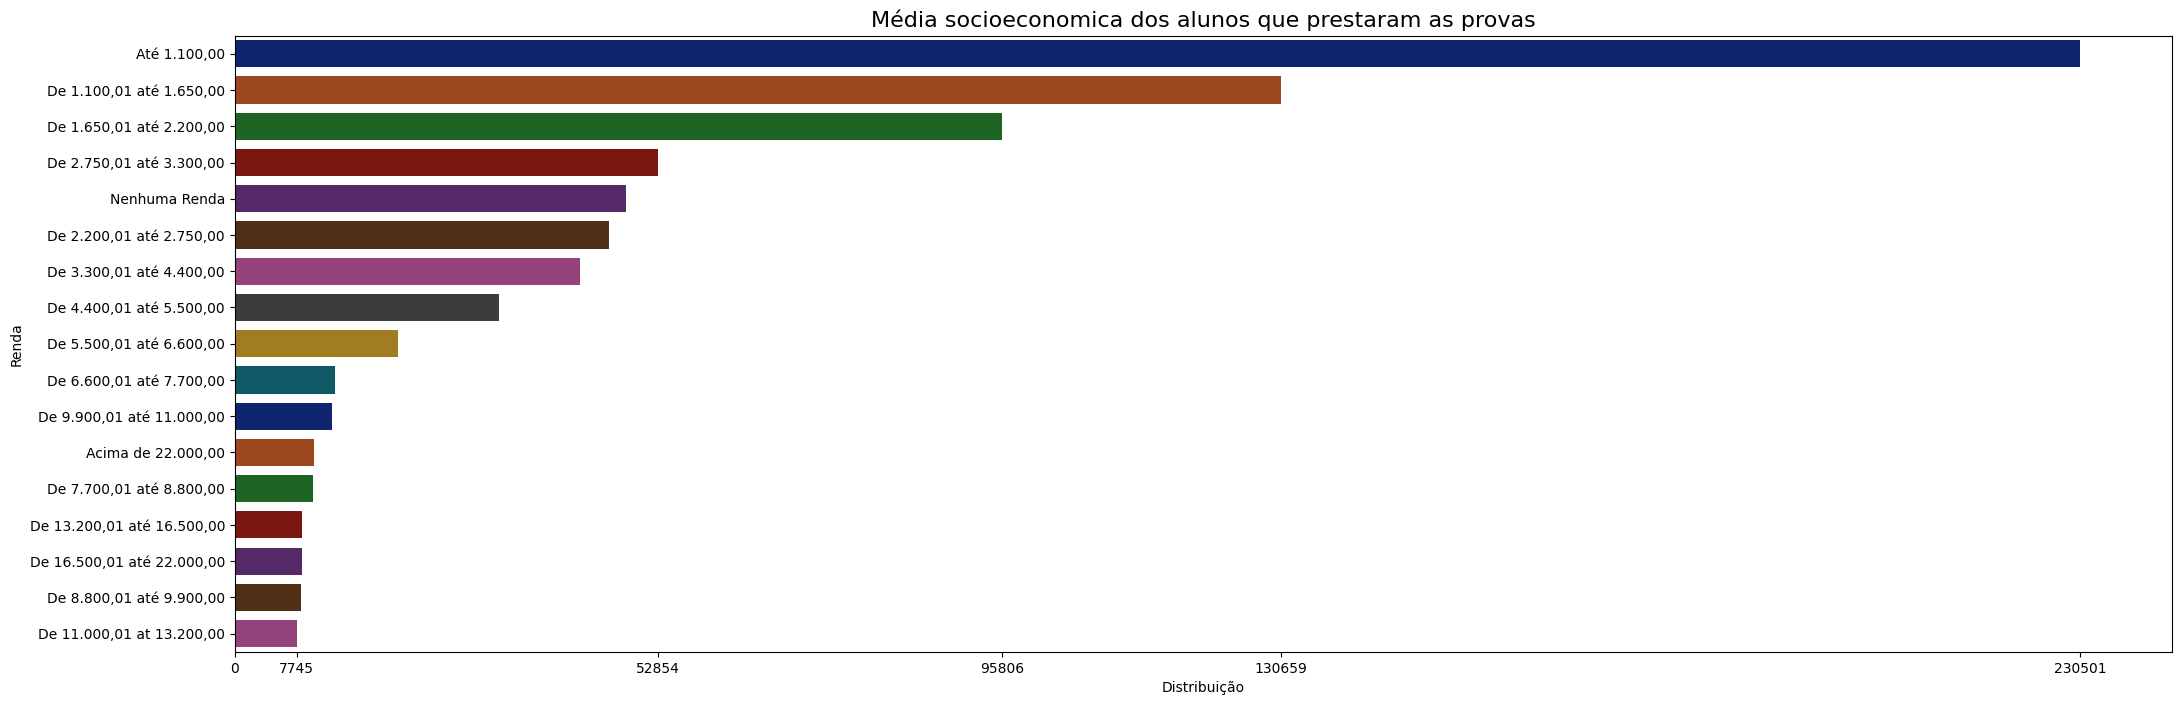

In [110]:
#3. Plotando a distribuição dos dados.
plt.figure(figsize=(25,8))
sns.barplot(y=data_socioeconomico['Renda'], x = data_socioeconomico['Distribuição'], dodge=True, 
            palette='dark', width=0.75).set_title('Média socioeconomica dos alunos que prestaram as provas', fontsize=16)
plt.xticks([0,230501,130659,95806,52854,7745]);

### 8. CALCULAR MEDIANA DE PONTOS DOS TREINEIROS

In [111]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,210052384164,2021,12,M,1,1,1,1,11,1,0,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
3,210052128335,2021,3,M,1,3,1,2,0,2,0,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,0,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,0,MG,1,1,1,1,910.0,879.0,889.0,900.0,487.4,476.5,450.7,493.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA,BADBB99999BDDEDAEEEDEDADEAEAEBAAECBCADADDCEDAB...,CBBCCDDEEEBCBCAEBBEDEACBCABCAEBADCEABEEBCBCEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,80.0,100.0,100.0,520.0,B,B,B,B,2.0,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,0,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B


In [112]:
#1. Variavel 'data_train' com a junção das colunas 'IN_TREINEIRO','NU_NOTA_CN',
#'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO' do dataset
data_train = data[['IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

#2. renomenado as colunas
data_train = data_train.rename(
    columns = {'IN_TREINEIRO':'Treineiro','NU_NOTA_CN':'Ciências da Natureza', 
               'NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
               'NU_NOTA_REDACAO':'Redação'}, copy=True)

#3. Localizando na coluna 'treineiro' o valor de '1' (variavel binaria que significa 0 == 'não e 1 == 'sim)
data_train.loc[data_train['Treineiro'] == 1].median()

#4. Variavel 'data_treineiro' com a tranformação em dataframe da varivael 'data_train' onde foi localizado 'treineiro' == '1'
data_treineiro = pd.DataFrame(data_train.loc[data_train['Treineiro'] == 1].mean())

#5. Renomeando a colunas 'médias'
data_treineiro.rename(columns={0:'Médias'}, inplace=True)

#6. Excluindo a coluna 'treineiro'
data_treineiro.drop(index='Treineiro', inplace=True)
data_treineiro.round(2)

,Médias
Ciências da Natureza,476.14
Ciências Humanas,510.47
Linguagens e Códigos,499.82
Matemática,527.34
Redação,620.61


Text(0.5, 1.0, 'Notas médias dos treineiros')

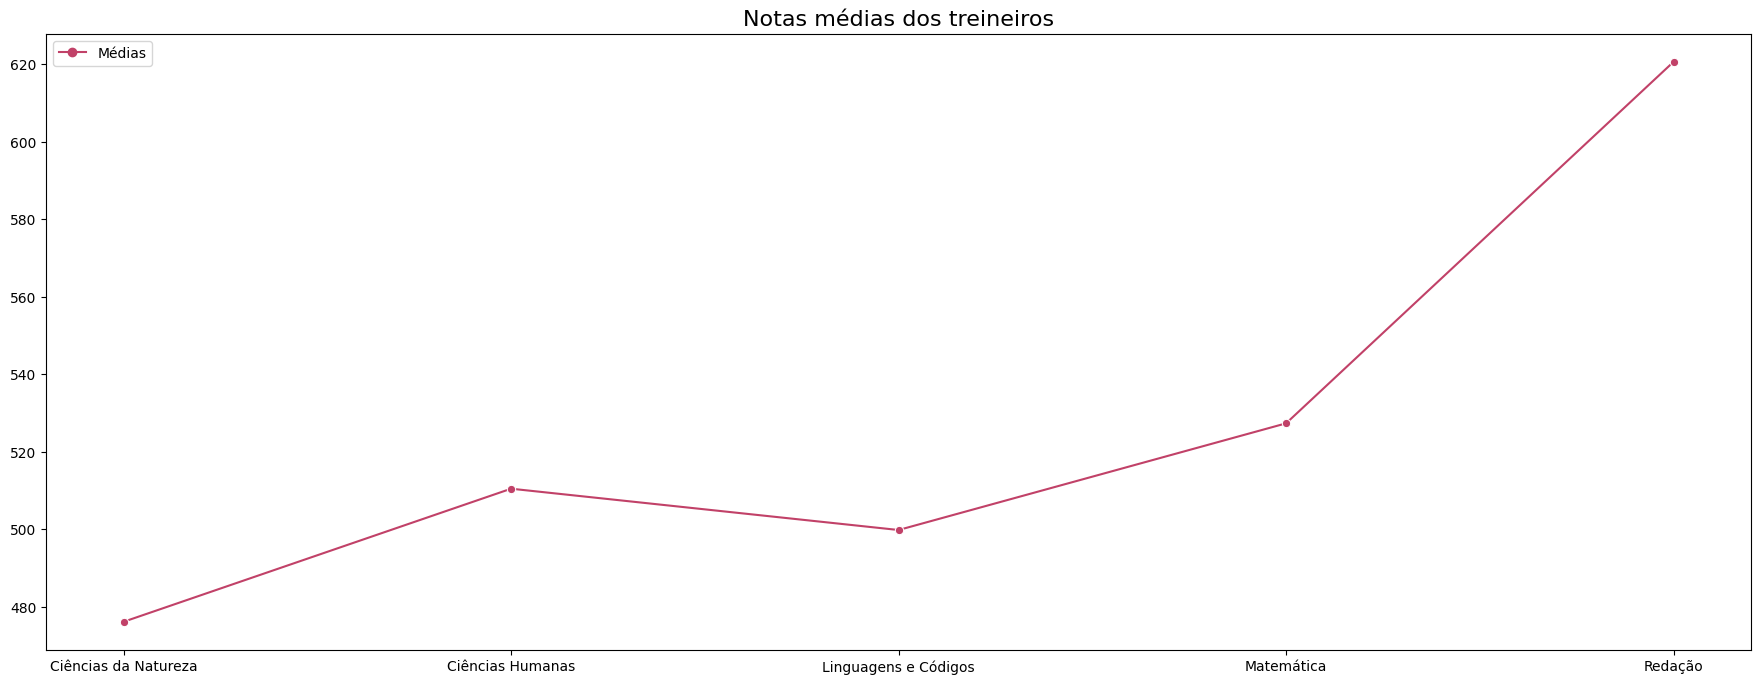

In [113]:
#7. plotando em grafico os dados resultantes
fig = plt.figure(figsize=(22,8))
sns.lineplot(data_treineiro, palette='flare', markers=True).set_title('Notas médias dos treineiros', fontsize=16)

### 9. CALCULAR MEDIANA DE PONTOS DOS ALUNOS QUE FAZEM PARA VALER;

In [114]:
#1. Variavel 'data_serio' com a junção das colunas 'IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO' do dataset
data_serio = data[['IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

#2. renomenado as colunas
data_serio = data_serio.rename(
    columns = {'IN_TREINEIRO':'Treineiro','NU_NOTA_CN':'Ciências da Natureza', 
               'NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
               'NU_NOTA_REDACAO':'Redação'}, copy=True)

#3. Localizando na coluna 'treineiro' o valor de '1' (variavel binaria que significa 0 == 'não'e 1 == 'sim')
data_serio.loc[data_train['Treineiro'] == 0].median()

#4. Variavel 'data_serio' com a tranformação em dataframe da varivael 'data_train' onde foi localizado 'treineiro' == '0'
data_serio = pd.DataFrame(data_serio.loc[data_train['Treineiro'] == 0].mean())

#5. Renomeando a colunas 'médias'
data_serio.rename(columns={0:'Médias'}, inplace=True)

#6. Excluindo a coluna 'treineiro'
data_serio.drop(index='Treineiro', inplace=True)
data_serio.round(2)

,Médias
Ciências da Natureza,490.08
Ciências Humanas,523.16
Linguagens e Códigos,503.34
Matemática,531.57
Redação,640.66


Text(0.5, 1.0, 'Notas médias dos alunos que fazem para valer')

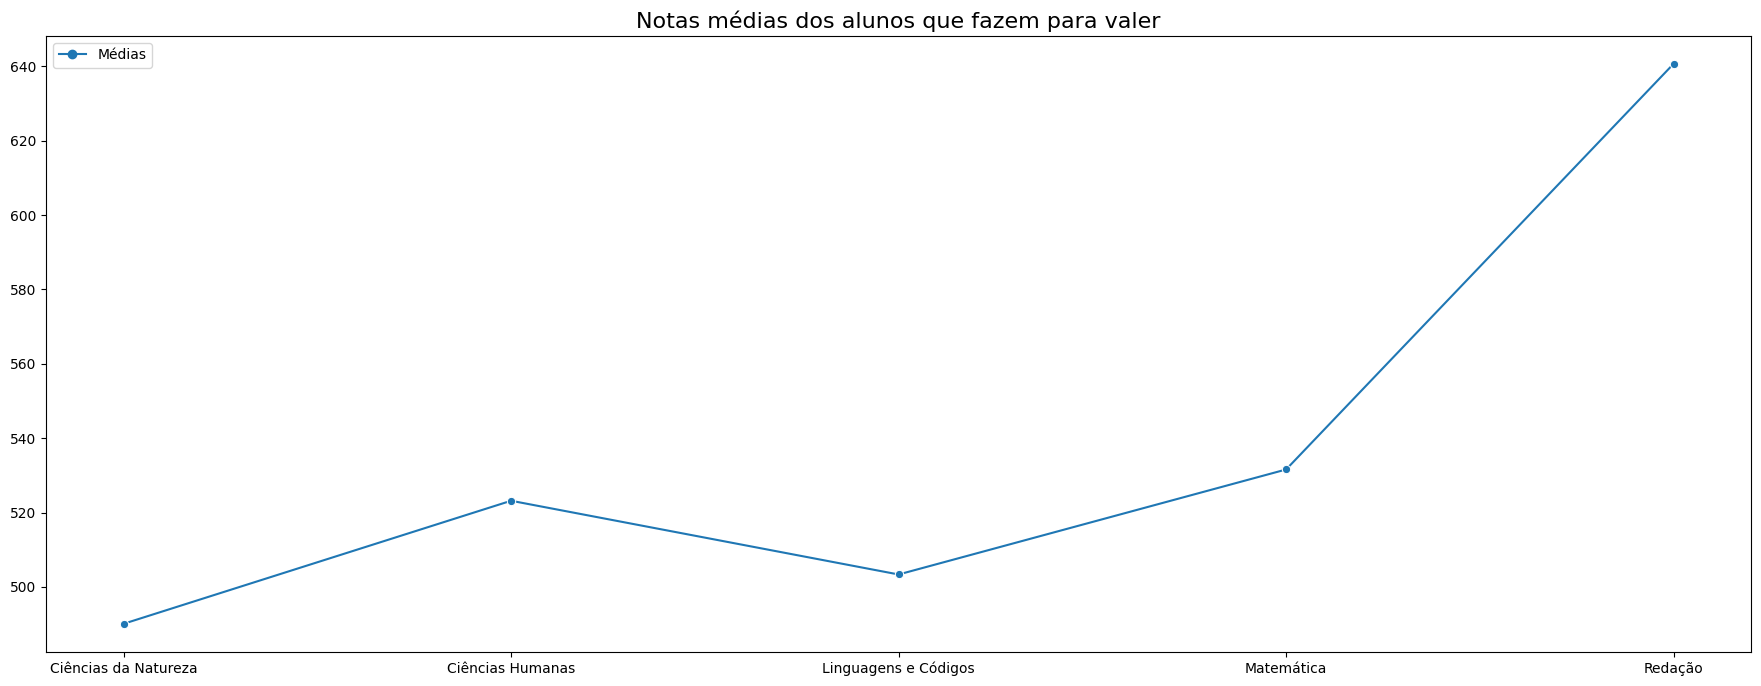

In [115]:
#7. plotando em grafico os dados resultantes
fig = plt.figure(figsize=(22,8))
sns.lineplot(data_serio, markers=True).set_title('Notas médias dos alunos que fazem para valer', fontsize=16)

### 10. CONFRONTAR MEDIANA ENTRE TREINEIROS X ALUNOS SÉRIOS;

In [116]:
#1. Jutando os dois df 'data_treineiros' e 'data_serio'
data_diferença = data_treineiro.merge(data_serio['Médias'], right_index=True, left_index=True, copy=True)

#2. Renomeando as colunas dos treineiros e dos que fazem para valer
data_diferença = data_diferença.rename(columns={'Médias_x': 'Alunos Treineiros', 'Médias_y':'Alunos que fizeram para valer'}, copy=True).unstack(level=-1)

#3. Criando uma variavel para visualização da diferença para o dashboard e transformando os index em colunas
data_dif_dash = pd.DataFrame(data_diferença).unstack(level=-2)[0]

#3.1 Resetando os index para manuseio das colunas
data_dif_dash.reset_index(inplace=True)

#3.2 Renomenado a colunas 'index' para 'Matérias'
data_dif_dash.rename(columns={'index':'Matérias'}, inplace=True)

#3.4 Arredondando o resultado para até 2 casas decimais
data_dif_dash = data_dif_dash.round(2)

#4. Calculando a diferença entre alunos que fazem para valer e treinerios
data_dif = (data_diferença['Alunos que fizeram para valer'] / data_diferença['Alunos Treineiros'] * 100) - 100
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.03%


In [117]:
data_dif_dash

,Matérias,Alunos Treineiros,Alunos que fizeram para valer
0,Ciências da Natureza,476.14,490.08
1,Ciências Humanas,510.47,523.16
2,Linguagens e Códigos,499.82,503.34
3,Matemática,527.34,531.57
4,Redação,620.61,640.66


Text(0.5, 1.0, 'Comparativo Notas de alunos que fizeram para valer x Notas Treineiros')

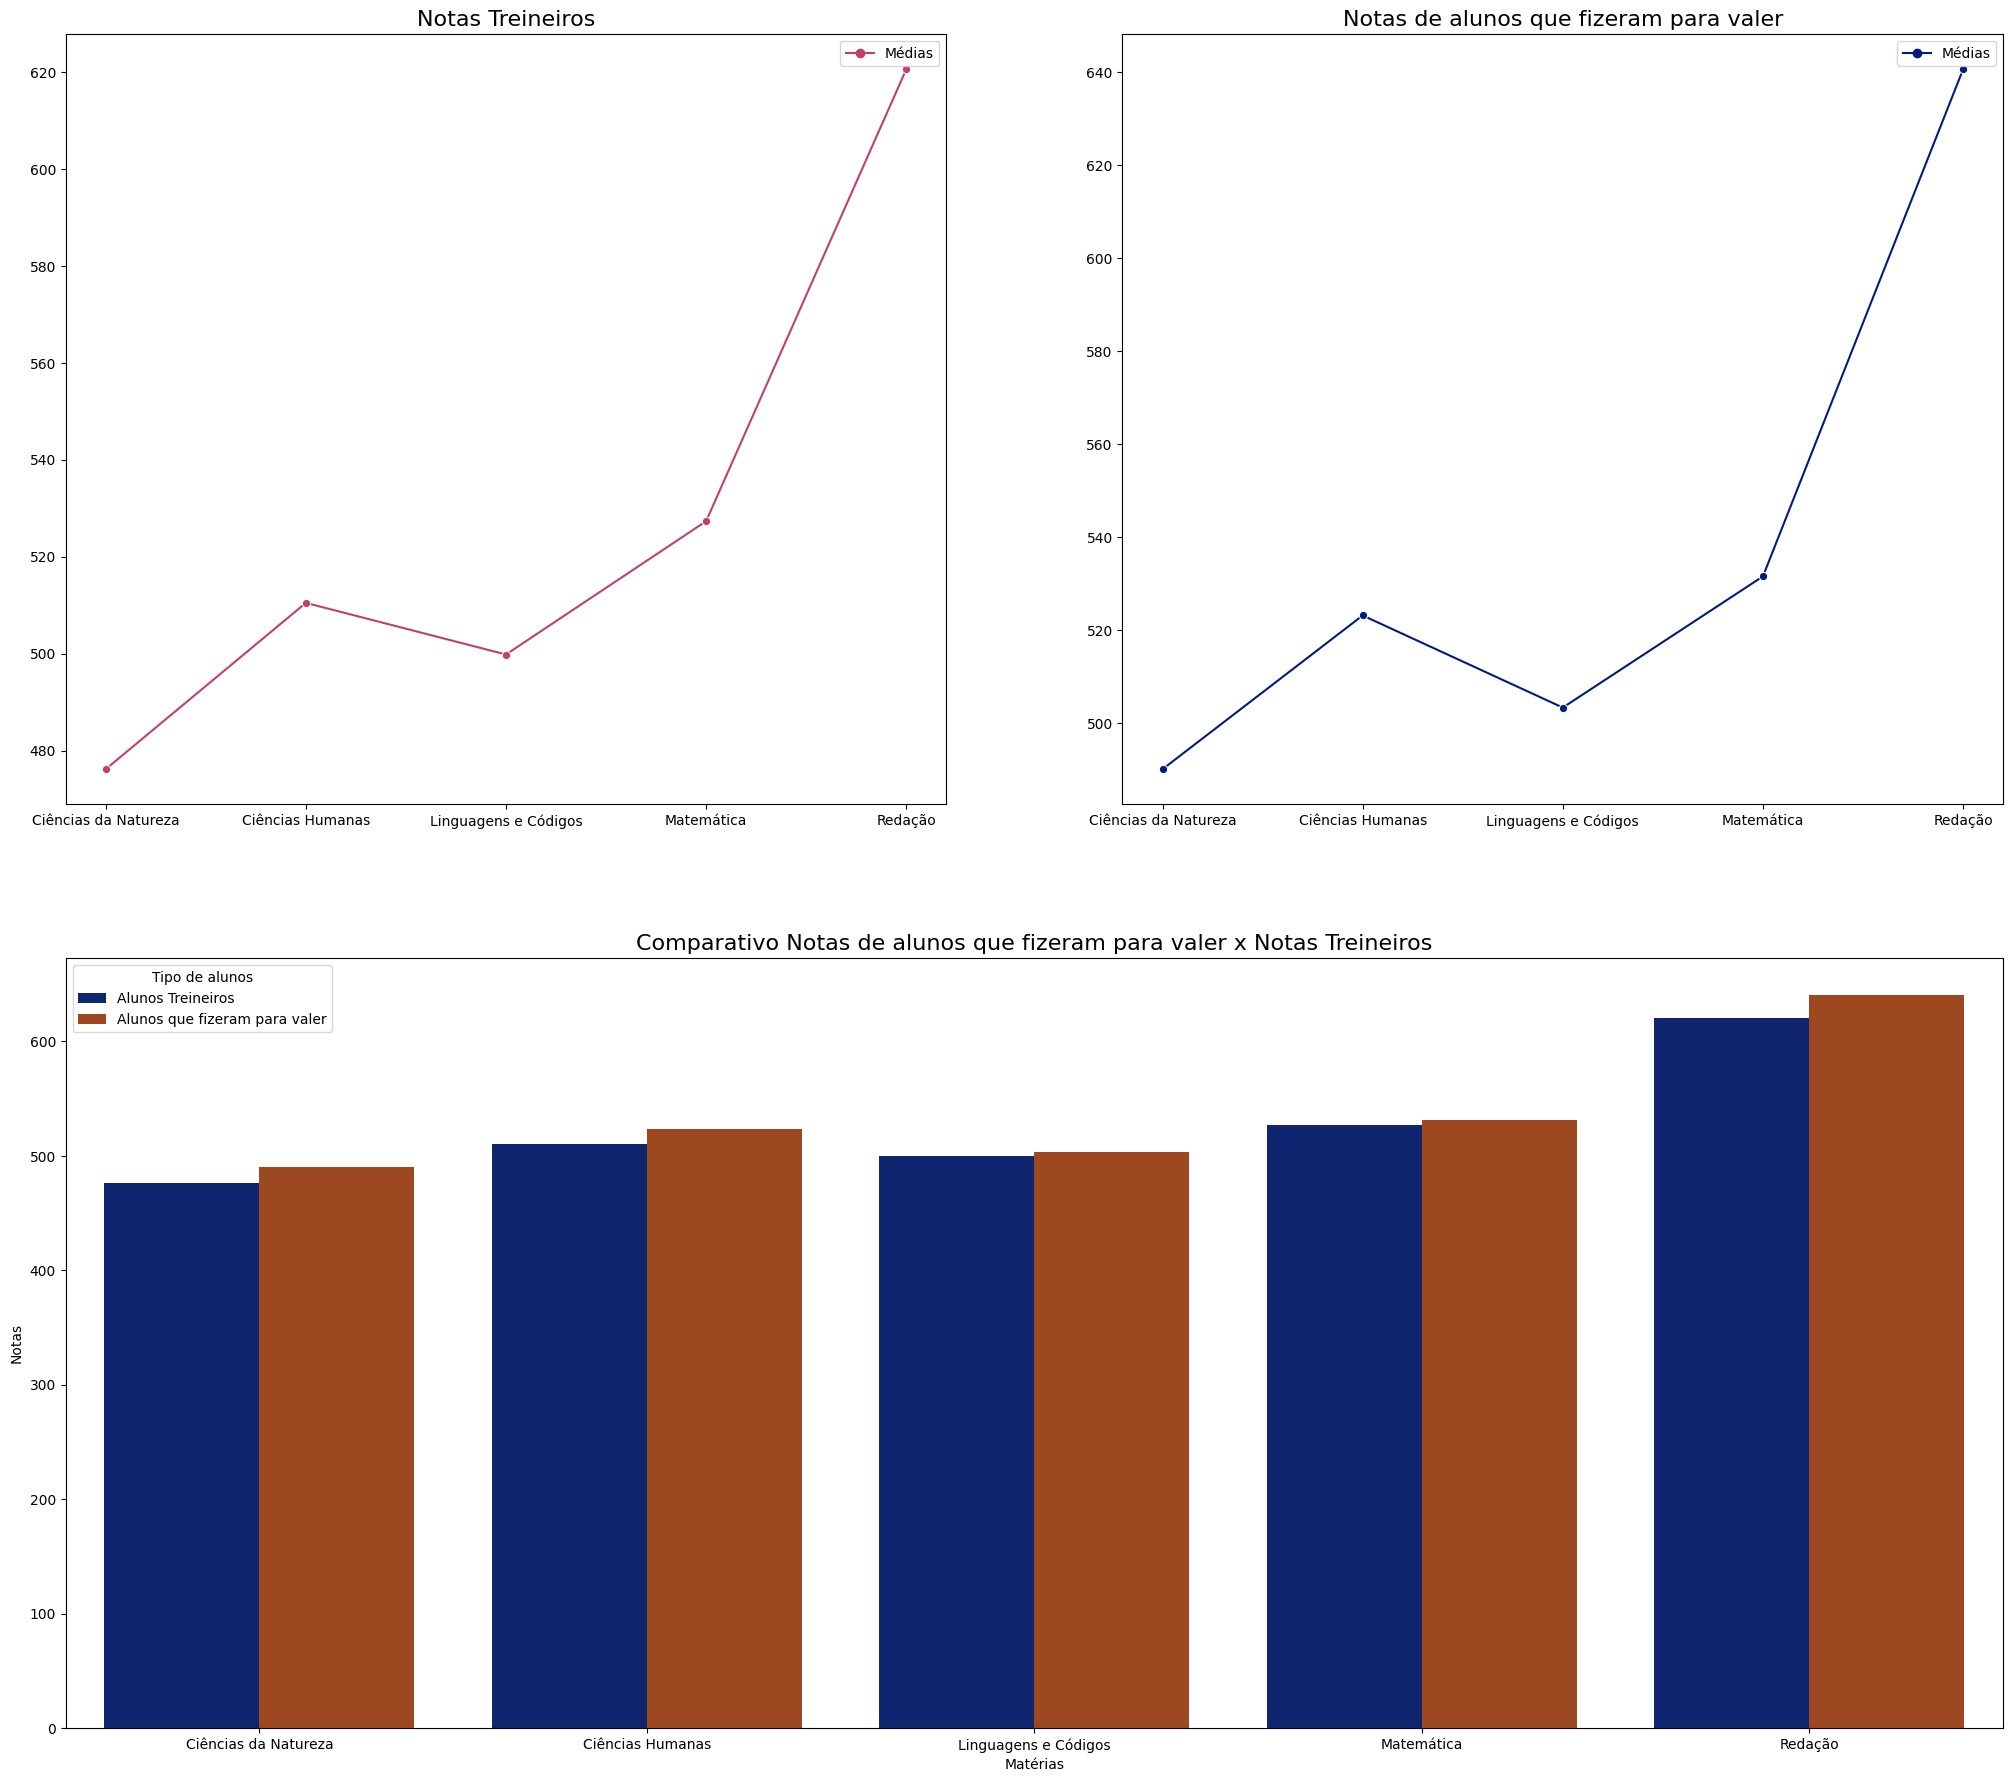

In [118]:
#5. Dashboard comparativo das notas dos alunos que fizeram para valer vs alunos treineiros
fig = plt.figure(figsize=(25,22))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
                
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, :])

sns.lineplot(data = data_treineiro, palette='flare', markers = True, 
             ax=ax1).set_title('Notas Treineiros', fontsize=16) #ajustar palette de cores.
sns.lineplot(data = data_serio, palette='dark', markers = True, 
             ax=ax2).set_title('Notas de alunos que fizeram para valer', fontsize=16) #ajustar palette de cores.
sns.barplot(data=data_dif_dash.melt(
    id_vars='Matérias', value_name='Notas', var_name='Tipo de alunos'), x='Matérias', y='Notas', 
    hue= 'Tipo de alunos', palette='dark', ax=ax3).set_title(
    'Comparativo Notas de alunos que fizeram para valer x Notas Treineiros', fontsize=16)

### 11. CALCULAR A IDADE E O PERCENTUAL DE PARTICIPANTES DE CADA FAIXA ETÁRIA

In [119]:
#1. visualização dos dados unicos da tabela faixa etaria
valuess = values(data=data,
       dado = data['TP_FAIXA_ETARIA'],
       coluna= data.columns[2],
       tipo = 'Valores',
       ind='Faixas Etárias')

dados unicos da coluna TP_FAIXA_ETARIA = [12  3  2  8  4  5 11  7 13  1 10  9  6 14 16 15 17 18 19 20]


In [120]:
valuess

,Faixas Etárias,Valores,Em % (percentual)
0,3,215931,27.72
1,2,200765,25.77
2,4,98886,12.69
3,1,60146,7.72
4,5,54298,6.97
5,6,32376,4.16
6,11,24951,3.20
7,7,21384,2.75
8,8,14567,1.87
9,12,12861,1.65


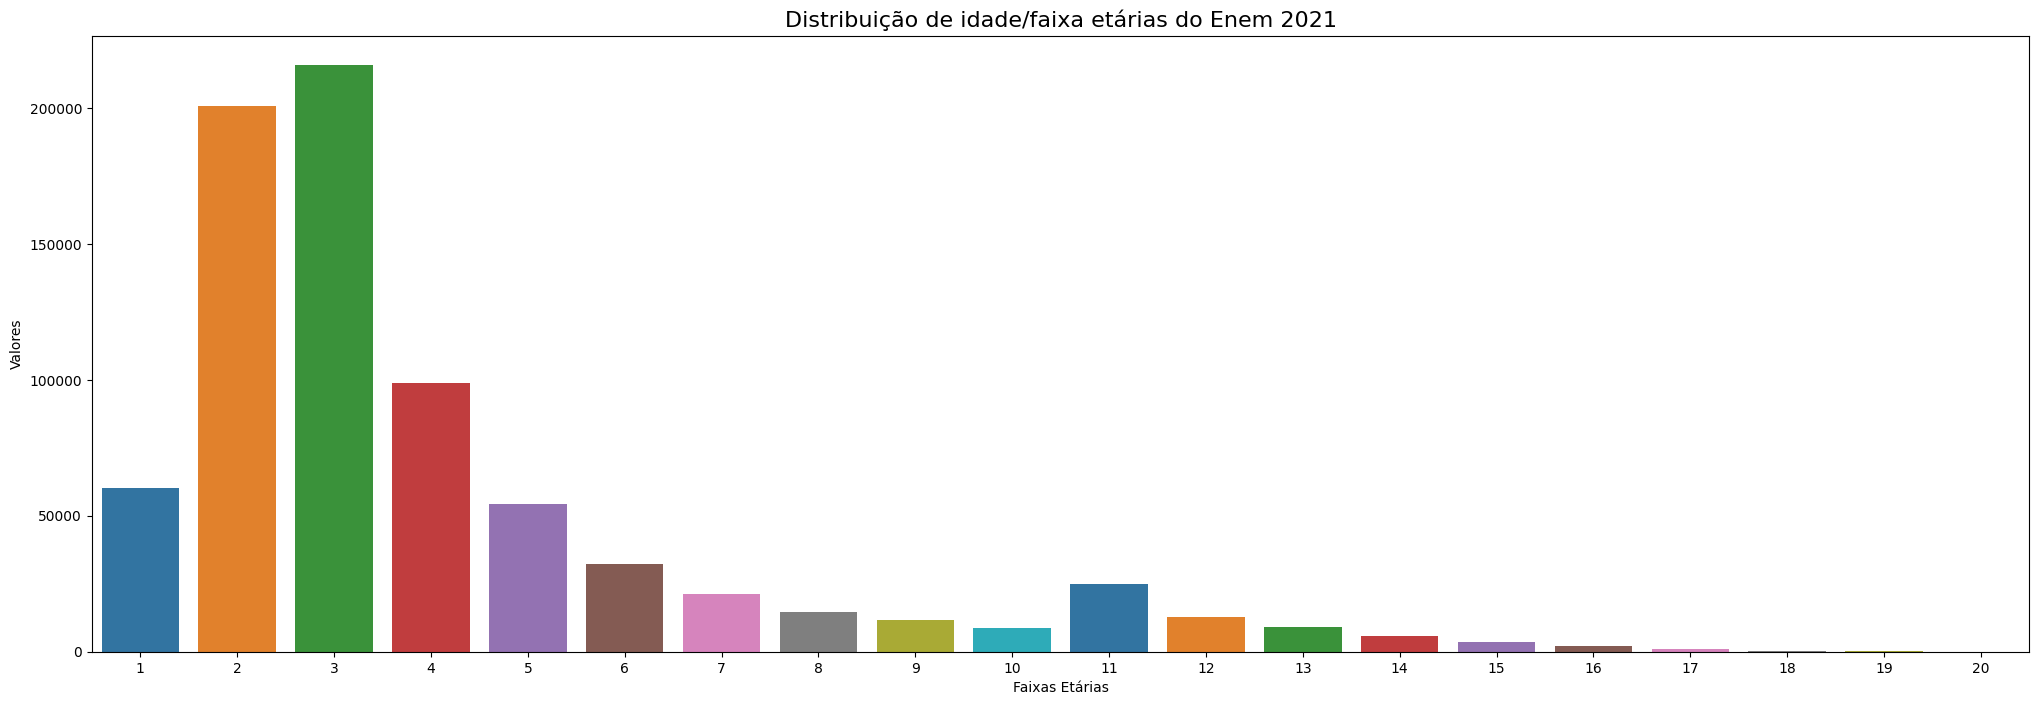

In [121]:
#2. Grafico da distribuição dos participantes do enem por faixa etaria
plt.figure(figsize=(25,8))
sns.barplot(y=valuess['Valores'], x=valuess['Faixas Etárias'], 
            palette='tab10').set_title(f'Distribuição de idade/faixa etárias do Enem 2021', fontsize=16);

### 12. COMPARAR QUAL A IDADE/FAIXA ETARIA QUE TEVE A MAIOR MÉDIA DE NOTAS;

In [122]:
#1. Criando a variavel 'data_idade'
data_idade = data[['TP_FAIXA_ETARIA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

#2. Renomeando as colunas da variavel 'data_idade'
data_idade = data_idade.rename(
    columns={'TP_FAIXA_ETARIA':'Faixa Etária','NU_NOTA_CN':'Ciências da Natureza', 
             'NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT':'Matemática', 
             'NU_NOTA_REDACAO':'Redação'}, copy=True)
 
#3. Criando a coluna 'Idade' com valores de idade baseados nos valores da coluna 'faixa etaria'
data_idade['Idade'] = data_idade['Faixa Etária'].apply(
    lambda x: 'Abaixo de 17 anos' if x == 1 else # utilizando o método 'apply' para executar a func de 
              '17 anos' if x == 2 else # atribuir valor das linhas da coluna 'idade' com base no valor da coluna 'faixa etaria'
              '18 anos' if x == 3 else
              '19 anos' if x == 4 else
              '20 anos' if x == 5 else
              '21 anos' if x == 6 else
              '22 anos' if x == 7 else
              '23 anos' if x == 8 else
              '24 anos' if x == 9 else
              '25 anos' if x == 10 else
              'Entre 26 e 30 anos' if x == 11 else
              'Entre 31 e 35 anos' if x == 12 else
              'Entre 36 e 40 anos' if x == 13 else
              'Entre 41 e 45 anos' if x == 14 else
              'Entre 46 e 50 anos' if x == 15 else
              'Entre 51 e 55 anos' if x == 16 else
              'Entre 56 e 60 anos' if x == 17 else
              'Entre 61 e 65 anos' if x == 18 else
              'Entre 66 e 70 anos' if x == 19 else 'Acima de 70 anos')
data_idade

,Faixa Etária,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Idade
1,12,505.9,551.8,498.3,461.5,560.0,Entre 31 e 35 anos
3,3,580.7,678.9,638.9,659.5,780.0,18 anos
4,2,497.7,532.4,457.6,582.6,780.0,17 anos
8,8,487.4,476.5,450.7,493.4,520.0,23 anos
9,4,507.6,539.2,494.6,413.3,380.0,19 anos
...,...,...,...,...,...,...,...
1048568,10,541.2,568.5,527.4,514.7,800.0,25 anos
1048569,3,642.1,670.1,584.1,699.0,900.0,18 anos
1048571,11,472.7,646.3,584.1,501.6,720.0,Entre 26 e 30 anos
1048572,3,451.0,498.6,523.2,428.2,580.0,18 anos


In [123]:
#4. Variavel 'data_meanns' com a média de nota das materias
data_means = data_idade[['Idade','Ciências da Natureza','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']]

#5. Agrupe `data_means` por idade e calcule a média de todas as outras colunas
grouped_means = data_means.groupby('Idade').mean()

#6. Calcule a média das médias obtidas no passo 2 para cada idade em `data_idade`
data_idade['Médias'] = data_idade['Idade'].map(grouped_means.mean(axis=1))

#7. Arredonde o resultado final para duas casas decimais, se necessário
data_idade['Médias'] = data_idade['Médias'].round(2)

#8 Agrupando os dados da variavel 'data_idade' pela coluna 'idade', tirando a média desses valores, 
#arredondando para 2 casas decimais e resetando os indexs.
data_idade = data_idade.groupby('Idade').mean().round(2).reset_index()

#9. Ordenando os dados descendentemente pela coluna 'média'
data_idade.sort_values('Médias', ascending=False)

,Idade,Faixa Etária,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Médias
5,22 anos,7.0,499.78,532.35,506.76,536.93,646.08,544.38
4,21 anos,6.0,498.37,528.23,505.24,535.56,650.14,543.51
3,20 anos,5.0,494.74,524.52,503.79,533.85,650.55,541.49
6,23 anos,8.0,499.24,532.53,506.78,532.86,633.55,540.99
7,24 anos,9.0,498.98,532.64,506.29,532.97,630.37,540.25
0,17 anos,2.0,486.95,520.79,506.18,537.34,647.08,539.67
8,25 anos,10.0,498.31,534.05,506.22,529.35,623.23,538.23
2,19 anos,4.0,489.45,520.05,502.32,530.70,648.16,538.14
11,Entre 26 e 30 anos,11.0,498.84,538.04,505.55,526.00,607.95,535.28
1,18 anos,3.0,484.54,517.34,501.41,528.26,640.19,534.35


### 13 COMPARATIVO DAS NOTAS ENTRE ESCOLA PÚBLICA E PRIVADA

In [124]:
#1. Variavel 'data_public' com a junção da variavel 'data_notas' e da coluna 'tp_escola' do dataset
data_public = data_notas.merge(dados['TP_ESCOLA'], right_index=True, left_index=True)

#2. Tranformando em um dataframe e localizando os dados da coluna 'tp_escola' == 2 (Escola publica) e vendo a mediana.
data_public = pd.DataFrame(data_notas.loc[data['TP_ESCOLA'] == 2].median())

#3. Resetando o index do dataset e renomeando a coluna 0 para 'notas'
data_public.rename(columns={0 : 'Notas'}, inplace=True)
data_public

,Notas
Ciências da Natureza,460.8
Ciências Humanas,498.9
Linguagens e Códigos,489.6
Matemática,487.9
Redação,600.0


In [125]:
#4. Variavel 'data_private' com a junção da variavel 'data_notas' e da coluna 'tp_escola' do dataset
data_private = data_notas.merge(dados['TP_ESCOLA'], right_index=True, left_index=True)

#5. Tranformando em um dataframe e localizando os dados da coluna 'tp_escola' == 3 (Escola privada) e vendo a mediana.
data_private = pd.DataFrame(data_notas.loc[data['TP_ESCOLA'] == 3].median())

#6. Resetando o index do dataset e renomeando a coluna 0 para 'notas'
data_private.rename(columns={0 : 'Notas'}, inplace=True)
data_private

,Notas
Ciências da Natureza,549.6
Ciências Humanas,586.9
Linguagens e Códigos,558.7
Matemática,625.1
Redação,780.0


In [126]:
#7. Jutando os dois df 'data_treineiros' e 'data_serio'
data_comparativo = data_public.merge(data_private['Notas'], right_index=True, left_index=True, copy=True)

#8. Renomeando as colunas dos treineiros e dos que fazem para valer
data_comparativo = data_comparativo.rename(columns={'Notas_x': 'Alunos escola pública', 
                                                    'Notas_y':'Alunos escola privada'}, copy=True).unstack(level=-1)

#9. Criando uma variavel para visualização da diferença para o dashboard e transformando os index em colunas
data_comp_PxP = pd.DataFrame(data_comparativo).unstack(level=-2)[0]

#9.1 Resetando os index para manuseio das colunas
data_comp_PxP.reset_index(inplace=True)

#9.2 Renomenado a colunas 'index' para 'Matérias'
data_comp_PxP.rename(columns={'index':'Matérias'}, inplace=True)

#9.3 Arredondando o resultado para até 2 casas decimais
data_comp_PxP = data_comp_PxP.round(2)

#10 Calculando a diferença entre os grupos
data_dif_PxP = (data_comp_PxP['Alunos escola privada'] / data_comp_PxP['Alunos escola pública'] * 100) - 100
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_PxP.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 21.83%


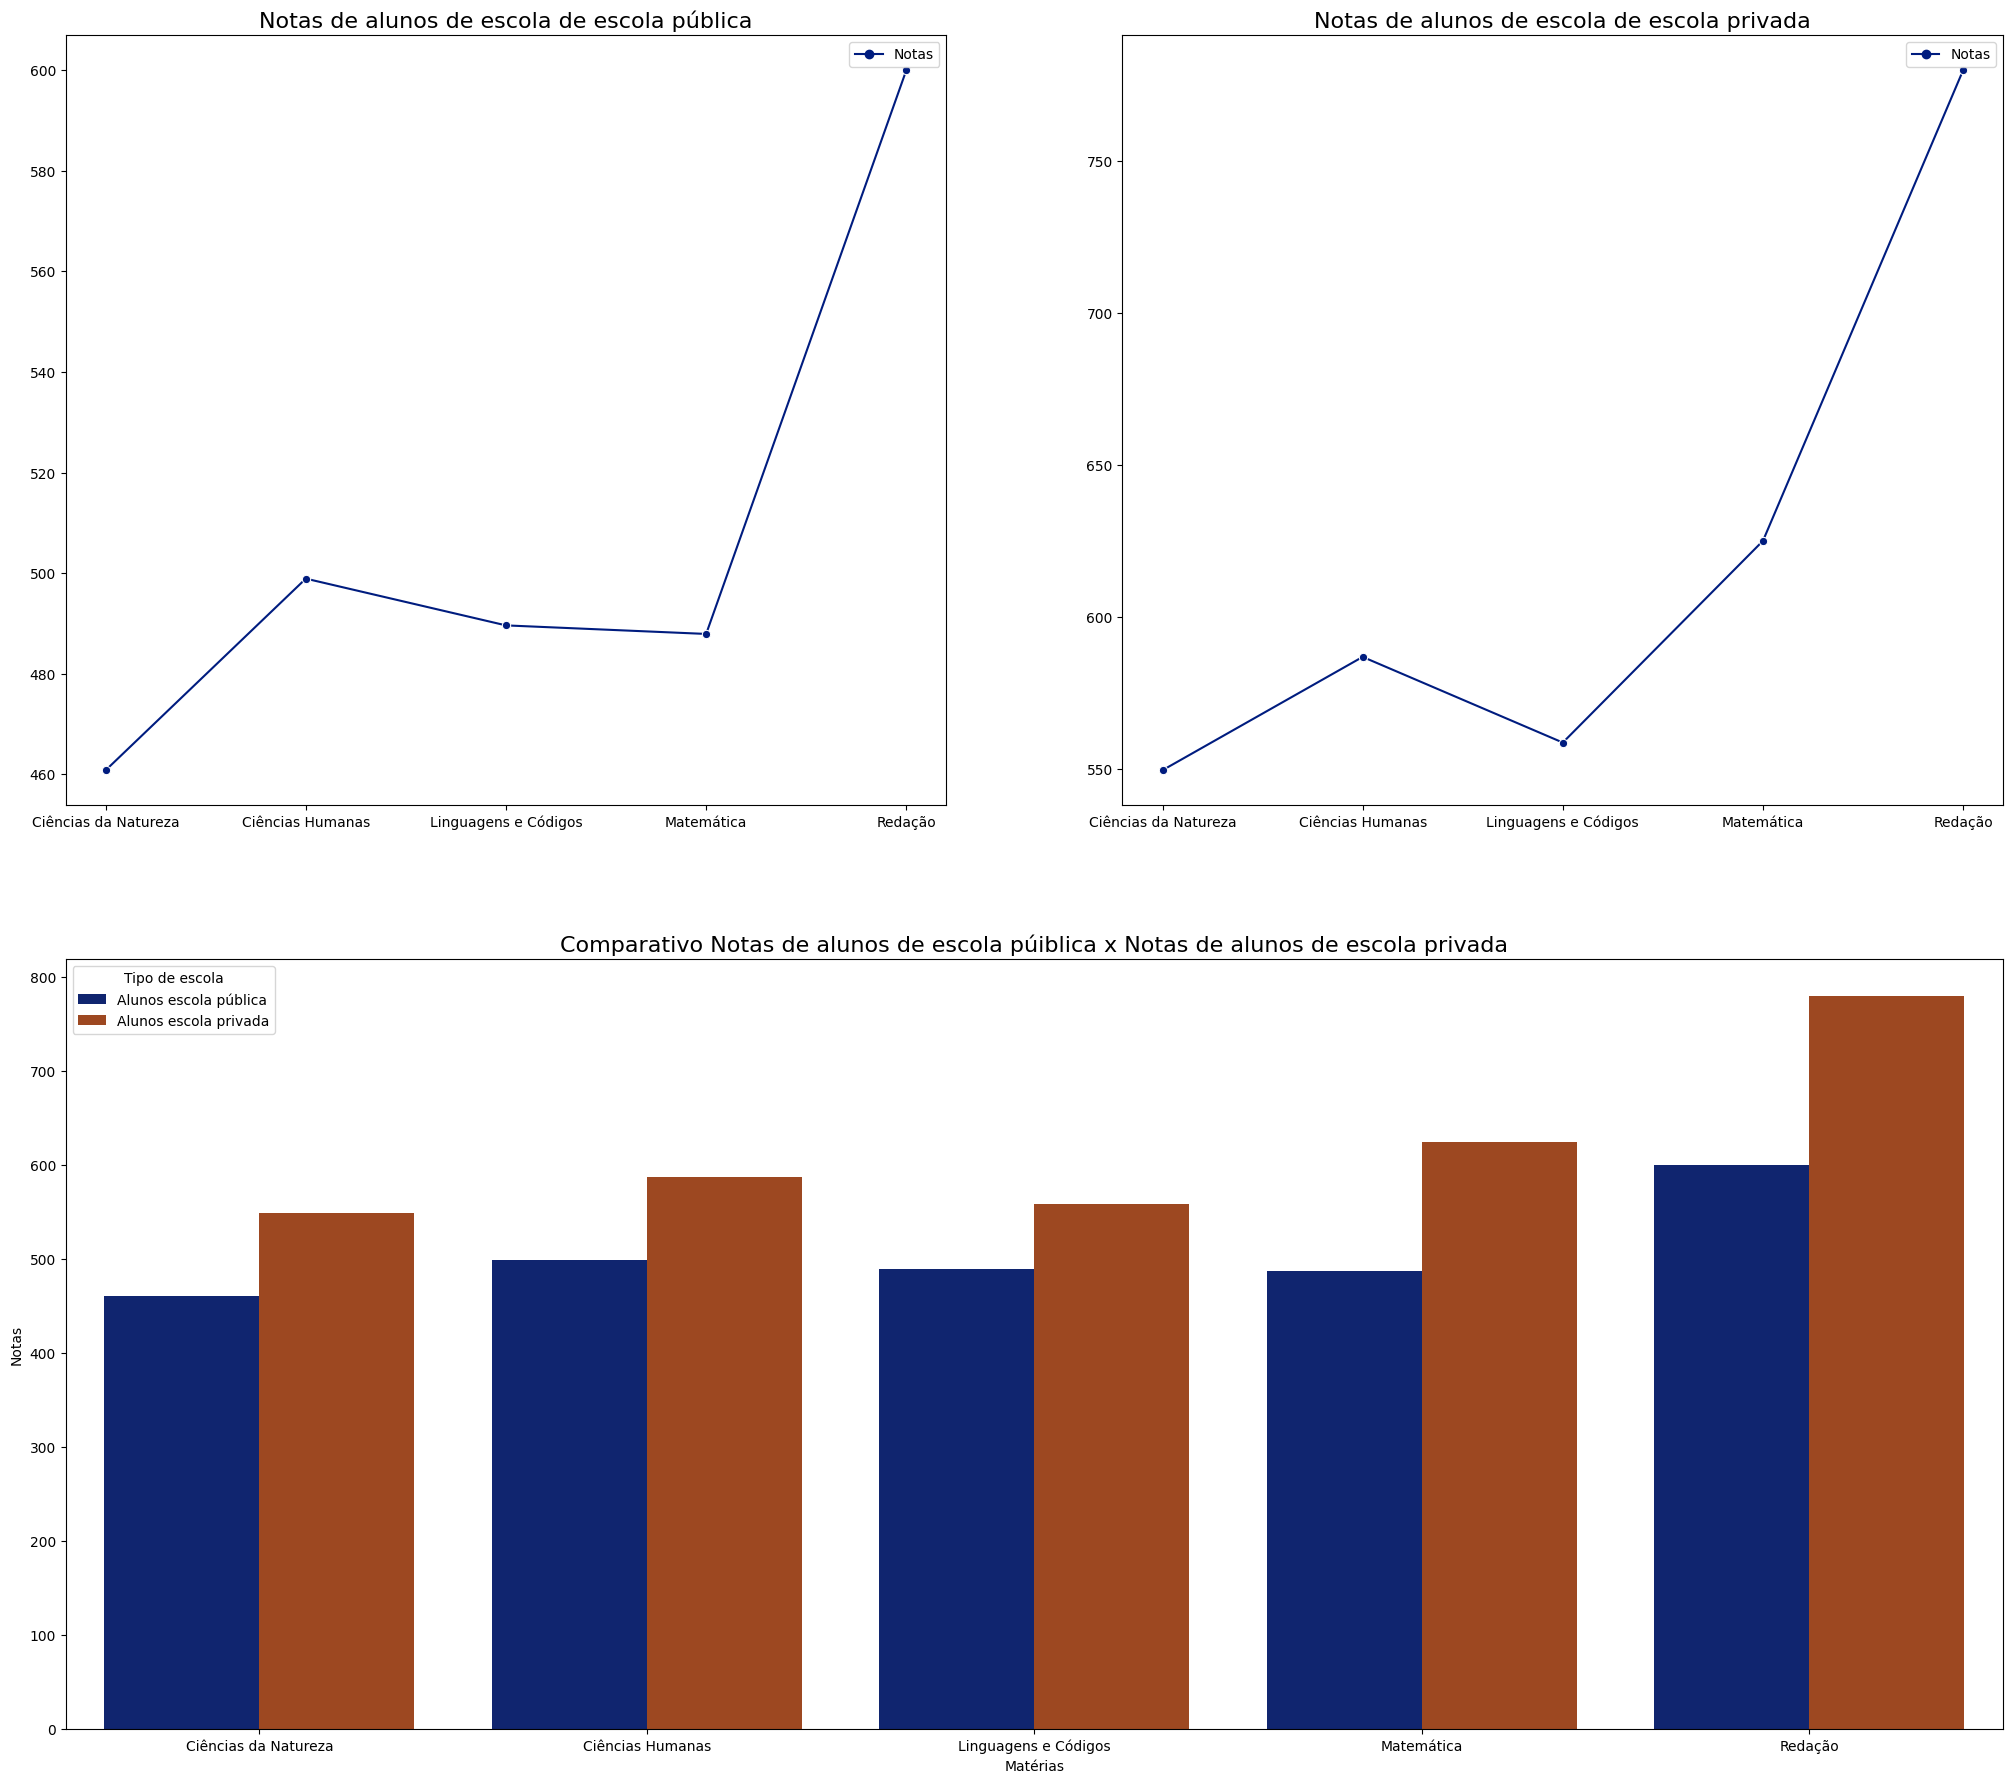

In [127]:
#7. Plotando as variaveis para comparação das notas
fig = plt.figure(figsize=(25,22))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
                
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[1, :])

sns.lineplot(data_public, palette='dark', markers=True, 
             ax=ax1).set_title('Notas de alunos de escola de escola pública', fontsize=16) #ajustar palette de cores.
sns.lineplot(data_private, palette='dark', markers=True,
             ax=ax2).set_title('Notas de alunos de escola de escola privada', fontsize=16); #ajustar palette de cores.
sns.barplot(data=data_comp_PxP.melt(
    id_vars='Matérias', value_name='Notas', 
    var_name='Tipo de escola'), x='Matérias', y='Notas', hue= 'Tipo de escola', palette='dark', ax=ax3).set_title(
    'Comparativo Notas de alunos de escola púiblica x Notas de alunos de escola privada', fontsize=16);

## RESOLVENDO AS METAS 

### H1
- Existe uma diferença significativa entre as notas de homens e mulheres

In [128]:
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_MxF.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.54%


Conforme analisado nas questões 1,2,3. Podemos ver que a diferença das notas entre Homens x Mulheres não é significativa. Cerca de 2.54% de diferença média entre a pontuação dos Homens para as Mulheres.

### H2 
- Os estados da região Sul tem notas melhores ao restante do país

In [129]:
data_uf_notas[['Médias','Região']].groupby('Região').mean().sort_values('Médias', ascending=False).reset_index()

,Região,Médias
0,Sudeste,559.34
1,Sul,553.96
2,Centro Oeste,533.35
3,Nordeste,523.03
4,Norte,511.11


Como mostra o Df acima, a hipotese de que as notas da região "Sul" são maiores que o restante do país, cai por terra. Pois como visto, as maiores médias são da região "Sudeste", seguido da região "Sul".

###  H3
- Os alunos que mais faltam à prova, são os de renda familiar menor

Como previsto pela hipotese, os alunos que mais faltam às provas, são os alunos enquadrados na faixa de renda de até R$ 1100,00. (Obs: Muito devido ao fato de também ser a faixa de renda que mais se inscreve para prestar a prova).

In [130]:
dados_all_faltantes

,Faltantes Exatas,Faltantes Humanas,Renda
0,103148,89050,"Até 1.100,00"
1,53384,45942,"Até 1.100,00"
2,32814,27916,"De 1.100,01 até 1.650,00"
3,24668,21503,"Até 1.100,00"
4,13169,11139,"Até 1.100,00"
5,12612,10554,"Até 1.100,00"
6,8743,7222,"Até 1.100,00"
7,5575,4606,"De 1.100,01 até 1.650,00"
8,3089,2466,"Até 1.100,00"
9,1680,1348,"Até 1.100,00"


### H4 
- Os alunos que fazem para valer tiram melhores notas se comparados aos treineiros

In [131]:
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 2.03%


Sim, de fato os alunos fazem a prova para valer tiram melhores notas. Mas se comparamos percentualmente, a diferença entre os dois grupos é baixissíma, cerca de 2.03% apenas.

### H5
- Alunos de escola privada possuem melhor performance na prova

Conforme exemplificado no gráfico, existe uma diferença considerável entre as notas de alunos de escola privada para alunos de escola pública, em torno de 21.83%.

In [132]:
print(f' A diferença dos alunos que fazem para valer para os treineiros é de cerca de {data_dif_PxP.mean().round(2)}%')

 A diferença dos alunos que fazem para valer para os treineiros é de cerca de 21.83%


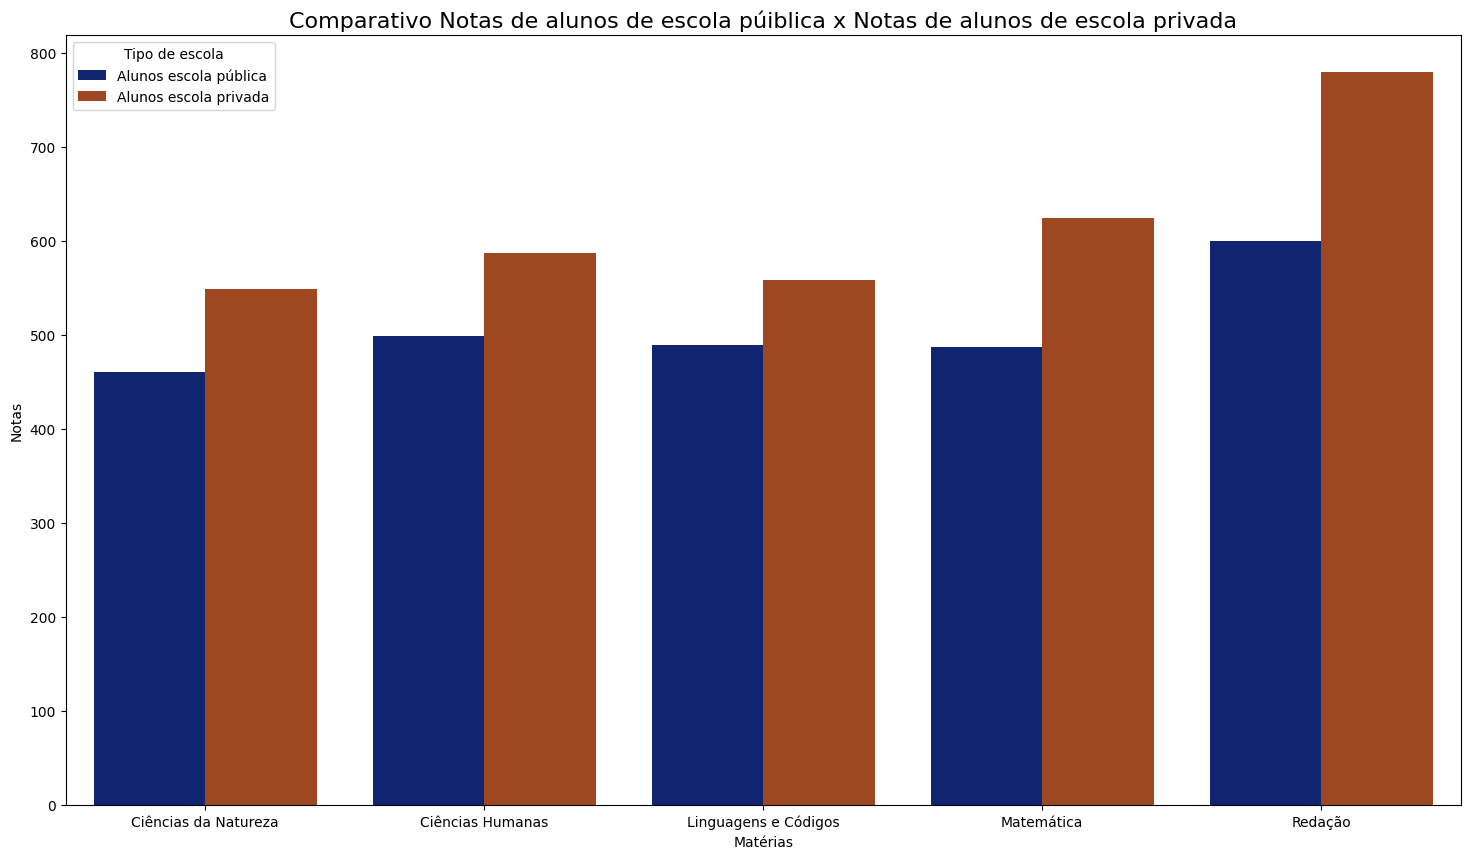

In [133]:
plt.figure(figsize=(18,10))
sns.barplot(data=data_comp_PxP.melt(id_vars='Matérias', value_name='Notas', var_name='Tipo de escola'), x='Matérias', y='Notas', hue= 'Tipo de escola', palette='dark').set_title(
    'Comparativo Notas de alunos de escola púiblica x Notas de alunos de escola privada', fontsize=16);

## INSIGHTS GERADOS DA ANÁLISE

#### - Os alunos possuem menor conhecimento na materia de Ciências da Natureza, seguido de Linguagens e Códigos, Ciências Humanas, Matemática e por fim Redação. 
#### - E mesmo a nota média da materia de Linguagens e codigos ter sido a 2° menor, isso não afetou na redação que teve a maior media de notas entre todas as matérias.
#### - A média total se somadas todas as matérias é de 536.39, o que mostra um baixo percentual de aprendizagem das matérias basicas.
#### - Conforme calculado, na maioria das notas, as pessoas do sexo feminimo se saem abaixo das pessoas do sexo masculino, principalmente nas matérias de exatas.
#### Somente na matéria de "Redação" que a medía de pontos do sexo Feminimo foi superior.
#### - Em geral alunos da região norte, obtém menores notas.
#### - Em contra partida, o Sudeste tem as maiores notas, seguido de perto pela região Sul
#### - Alunos que fizeram para valer tiram maiores notas em todas as matérias do Enem
#### - Podemos concluir que mais de 66% dos candidatos que relizam a prova, estão entre os 17 e 19 anos de idade.
#### - Pela comparação de médias entre escola pública e privada, podemos concluir que as notas de alunos de escola do tipo privada, são em média 21.83% maiores.
#### - Em geral mulheres faltam mais que os homens na prova do Enem.
#### - Por ser a faixa etária mais presente nas inscrições, os alunos de 18 anos também são os que mais faltam 
#### - Os alunos que mais faltam, estão classificados na faixa de renda de até 1100.00 e os que menos faltam estao classificados na faixa de renda de 11.000,01 at 13.200,00
#### - A faixa de renda com mais participantes é a de até 1100
#### - Apesar de nada muito expresivo, a mediana de notas dos alunos que fazem para valer é cerca de 2.03% superior aos treineiros.
#### - A faixa etária tipo 3 (18 anos) é a que mais comparece 
#### - A faixa etária com a maior média é a dos alunos com 22 anos.